In [75]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv("loan.csv", low_memory=False) #set low_memory=False as it is a huge file

In [77]:
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [78]:
df.shape #checking no of rows & columns

(39717, 111)

# Data Cleanup

In [79]:
df.isnull().mean()*100 #check the percentage of empty/NaN data in each column

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [80]:
#as there are lot of columns with majorly empty/NaN data, dropping them first
for col in df.columns:
    nullCount = (df[col].isnull().mean()*100)
    if nullCount>90:
        df=df.drop(col,axis=1)

In [81]:
df.isnull().mean()*100 #checking current state of empty data in columns

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [82]:
# There are a few more columns with some empty data. mths_since_last_delinq has >60% empty data so we can drop it but would like
# to evaluate description column first
df['desc'].head(20)

# After seeing below result - desc looks like detailed description which does not seem very helpful at this point. 
# There are other more relevant columns to derive data from so going to drop this as well 

0       Borrower added on 12/22/11 > I need to upgra...
1       Borrower added on 12/22/11 > I plan to use t...
2                                                   NaN
3       Borrower added on 12/21/11 > to pay for prop...
4       Borrower added on 12/21/11 > I plan on combi...
5                                                   NaN
6       Borrower added on 12/18/11 > I am planning o...
7       Borrower added on 12/16/11 > Downpayment for...
8       Borrower added on 12/21/11 > I own a small h...
9       Borrower added on 12/16/11 > I'm trying to b...
10      Borrower added on 12/15/11 > I had recived a...
11                                                  NaN
12      Borrower added on 12/15/11 > Plan to pay off...
13      Borrower added on 12/19/11 > I intend to pay...
14                                                  NaN
15                                                  NaN
16                                                  NaN
17      Borrower added on 12/15/11 > Payoff othe

In [83]:
#dropping above 2 columns
df=df.drop(['desc','mths_since_last_delinq'] ,axis=1)

In [84]:
#Removing the rows where certain columns are not available. Safe to do since its a very small set of such rows
# Alternatively, we could also replace these null values with median (for numeric values) and mode (for say emp_length) 
# but I am remvoing the rows due to small count of such rows
df=df[df["emp_title"].notna()]
df=df[df["emp_length"].notna()]
df=df[df["last_pymnt_d"].notna()]
df=df[df["last_credit_pull_d"].notna()]
df=df[df["collections_12_mths_ex_med"].notna()]

In [85]:
df.isnull().mean()*100 #checking current state of empty data in columns

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.000000
emp_length                    0.000000
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.024265
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [86]:
# Data looks majorly clean now. Let us see some of the values to understand the next steps
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
10,1070078,1305201,6500,6500,6500.0,60 months,14.65%,153.45,C,C3,...,1655.54,Dec-15,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
11,1069908,1305008,12000,12000,12000.0,36 months,12.69%,402.54,B,B5,...,6315.30,Aug-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
12,1064687,1298717,9000,9000,9000.0,36 months,13.49%,305.38,C,C1,...,305.38,Nov-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [87]:
# Also checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37091 entries, 1 to 39665
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          37091 non-null  int64  
 1   member_id                   37091 non-null  int64  
 2   loan_amnt                   37091 non-null  int64  
 3   funded_amnt                 37091 non-null  int64  
 4   funded_amnt_inv             37091 non-null  float64
 5   term                        37091 non-null  object 
 6   int_rate                    37091 non-null  object 
 7   installment                 37091 non-null  float64
 8   grade                       37091 non-null  object 
 9   sub_grade                   37091 non-null  object 
 10  emp_title                   37091 non-null  object 
 11  emp_length                  37091 non-null  object 
 12  home_ownership              37091 non-null  object 
 13  annual_inc                  37091 no

Based on above, some of the columns need to be cleaned further for proper analysis :
1. int_rate - Remove % and change to numberic
2. emp_length - Convert to numeric values

In [88]:
# convert term, int_rate & emp_length into numeric cols, rename headers to more meaningful
df['int_rate'] = df['int_rate'].str.replace('%', '')
df['emp_length'] = df['emp_length'].str.replace('< ', '') #do it using regex
df['emp_length'] = df['emp_length'].str.replace('+ years', '')
df['emp_length'] = df['emp_length'].str.replace('years', '')
df['emp_length'] = df['emp_length'].str.replace('year', '')

In [89]:
df[['int_rate', 'emp_length']] = df[['int_rate', 'emp_length']].apply(pd.to_numeric) 
# convert to int datatype so that numeric operations like mean can be applied

In [90]:
#checking if data types & values are correct now
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37091 entries, 1 to 39665
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          37091 non-null  int64  
 1   member_id                   37091 non-null  int64  
 2   loan_amnt                   37091 non-null  int64  
 3   funded_amnt                 37091 non-null  int64  
 4   funded_amnt_inv             37091 non-null  float64
 5   term                        37091 non-null  object 
 6   int_rate                    37091 non-null  float64
 7   installment                 37091 non-null  float64
 8   grade                       37091 non-null  object 
 9   sub_grade                   37091 non-null  object 
 10  emp_title                   37091 non-null  object 
 11  emp_length                  37091 non-null  int64  
 12  home_ownership              37091 non-null  object 
 13  annual_inc                  37091 no

In [91]:
df.loc[:,['int_rate','emp_length']].head(10)
# data looks good now, lets proceed further

,int_rate,emp_length
1,15.27,1
3,13.49,10
4,12.69,1
5,7.90,3
6,15.96,8
7,18.64,9
9,12.69,1
10,14.65,5
11,12.69,10
12,13.49,1


### Categorise Columns
We categorise columns into sub categories so that we can apply operations in bulk

Key categories here could be
1. Customer Profile Data : This includes customer data like Income, Purpose, Employment, etc
2. Loan Attributes : This category would have data around the details/type of loan that company offers such as Grade, Interest, Term, etc
3. Redundant Data : This includes columns with Empty / NaN data or columns not useful to this analysis like member id, nex payment date, etc
   

One of the categories is *extra_cols* which are not significant to this analysis. We will soon remove them from our dataframe (df). These mainly include 
- individual identifiers like member_id
- columns like "funded_amnt","funded_amnt_inv", which are all derivations of key columns like "loan_amnt". These columns are related and will produce similar analysis hence we will just keep "loan_amnt"
- columns which 'out_prncp' that might not be indicative of default probability as these are only available after loan approval

In [92]:
cat_cols=["home_ownership","verification_status","loan_status","grade","term","purpose","zip_code","addr_state"]
num_cols=["loan_amnt","int_rate","installment","emp_length","annual_inc","dti","delinq_2yrs","inq_last_6mths","open_acc","pub_rec","revol_bal","total_pymnt"]
date_cols=["issue_d","earliest_cr_line"]
extra_cols=["id","member_id","sub_grade","emp_title","pymnt_plan","url","title","funded_amnt","funded_amnt_inv","collection_recovery_fee","revol_util","out_prncp","policy_code","acc_now_delinq","chargeoff_within_12_mths","delinq_amnt","pub_rec_bankruptcies","tax_liens"]

In [93]:
df=df.drop(extra_cols,axis=1) #Drop unwanted columns

In [94]:
df.shape

(37091, 35)

In [95]:
df.isnull().mean()*100 #Data should mainly appear clean now

loan_amnt                     0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
emp_length                    0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
purpose                       0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal                     0.0
total_acc                     0.0
initial_list_status           0.0
out_prncp_inv                 0.0
total_pymnt                   0.0
total_pymnt_inv               0.0
total_rec_prncp               0.0
total_rec_int                 0.0
total_rec_late_fee            0.0
recoveries    

### Identify Outliers, if any

In [96]:
df.describe()
#see if any key numeric column has huge gap b/w mean & median indicating some outliers which might need to be cleaned further

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,total_acc,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med
count,37091.000000,37091.000000,37091.000000,37091.000000,3.709100e+04,37091.000000,37091.000000,37091.000000,37091.000000,37091.000000,...,37091.000000,37091.000000,37091.000000,37091.000000,37091.000000,37091.000000,37091.000000,37091.000000,37091.000000,37091.0
mean,11285.999299,12.056792,326.183278,5.111590,6.925905e+04,13.402910,0.147044,0.868054,9.347065,0.053301,...,22.184223,51.287041,12274.204988,11680.825052,9889.193655,2290.764042,1.342275,92.905097,2721.931474,0.0
std,7419.051471,3.717651,207.448210,3.398686,6.423503e+04,6.651269,0.493911,1.066592,4.393723,0.234157,...,11.385074,375.135212,9019.171764,8919.677112,7036.504661,2613.273286,7.240082,681.090901,4456.456545,0.0
min,500.000000,5.420000,16.080000,1.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,...,2.000000,0.000000,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.010000,0.0
25%,5600.000000,9.320000,168.860000,2.000000,4.160000e+04,8.320000,0.000000,0.000000,6.000000,0.000000,...,14.000000,0.000000,5662.076422,5240.005000,4800.000000,677.515000,0.000000,0.000000,225.075000,0.0
50%,10000.000000,11.860000,283.370000,4.000000,6.000000e+04,13.500000,0.000000,1.000000,9.000000,0.000000,...,21.000000,0.000000,10079.665880,9443.740000,8050.000000,1377.830000,0.000000,0.000000,565.440000,0.0
75%,15000.000000,14.590000,432.220000,9.000000,8.294600e+04,18.650000,0.000000,1.000000,12.000000,0.000000,...,29.000000,0.000000,16656.353400,15935.000000,13950.000000,2868.475000,0.000000,0.000000,3412.905000,0.0
max,35000.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,...,90.000000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,36115.200000,0.0


In [97]:
# Anuual income shows outliers as there is huge gap in 75 percentile & max value. Lets check further & remove outliers
df['annual_inc'].describe(percentiles=[.98,.99,.9999,.99999]) 

count     3.709100e+04
mean      6.925905e+04
std       6.423503e+04
min       4.000000e+03
50%       6.000000e+04
98%       1.832000e+05
99%       2.300000e+05
99.99%    1.816338e+06
100%      5.221110e+06
max       6.000000e+06
Name: annual_inc, dtype: float64

In [98]:
df = df[df['annual_inc'] <= 200000] #Removing outliers

In [99]:
df['annual_inc'].describe(percentiles=[.25,.75,.98,.99,.9999,.99999]) #Verify annual income data after removing outliers

count      36570.000000
mean       65212.160334
std        33246.101672
min         4000.000000
25%        41000.000000
50%        59000.000000
75%        80500.000000
98%       158000.000000
99%       175000.000000
99.99%    200000.000000
100%      200000.000000
max       200000.000000
Name: annual_inc, dtype: float64

In [100]:
df.shape

(36570, 35)

# Derive Attributes
Deriving certain attributes based on existing data for further analysis.
This includes type, business & data driven derived attributes

### Type Driven Derived Attributes

In [101]:
df['loan_status'].unique()
# This is a categorical columns with string values. It would be best to derive a numeric column indicating default out of it
# However, value 'Current' indicates the loan is not yet closed i.e. we dont know if these people will default or not. 
# Best to remove them out of analysis

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

In [102]:
df.shape

(36570, 35)

In [103]:
df = df.query('loan_status != "Current"')

In [104]:
df.shape

(35519, 35)

In [105]:
# Converting this categorical value to numeric for making further analysis easy (liek identifying correlation with other columns)
df['didDefault'] = df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
num_cols.append('didDefault')

In [106]:
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,didDefault
1,2500,60 months,15.27,59.83,C,1,RENT,30000.0,Source Verified,Dec-11,...,456.46,435.17,0.00,117.08,Apr-13,119.66,Sep-13,0.0,INDIVIDUAL,1
3,10000,36 months,13.49,339.31,C,10,RENT,49200.0,Source Verified,Dec-11,...,10000.00,2214.92,16.97,0.00,Jan-15,357.48,Apr-16,0.0,INDIVIDUAL,0
5,5000,36 months,7.90,156.46,A,3,RENT,36000.0,Source Verified,Dec-11,...,5000.00,632.21,0.00,0.00,Jan-15,161.03,Jan-16,0.0,INDIVIDUAL,0
6,7000,60 months,15.96,170.08,C,8,RENT,47004.0,Not Verified,Dec-11,...,6985.61,3125.23,0.00,0.00,May-16,1313.76,May-16,0.0,INDIVIDUAL,0
7,3000,36 months,18.64,109.43,E,9,RENT,48000.0,Source Verified,Dec-11,...,3000.00,939.14,0.00,0.00,Jan-15,111.34,Dec-14,0.0,INDIVIDUAL,0


In [107]:
# verification_status might be a useful columns to identify if the unverified candidates have higher default rate.
# Checking unique values & accordingly converting into 0/1
df['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [108]:
df['isVerified'] = df['verification_status'].apply(lambda x: 0 if x=='Not Verified' else 1)
num_cols.append('isVerified')

In [109]:
#Verify the new column values are set correctly
df.loc[:,['loan_status','didDefault','isVerified','verification_status']].head(10)

,loan_status,didDefault,isVerified,verification_status
1,Charged Off,1,1,Source Verified
3,Fully Paid,0,1,Source Verified
5,Fully Paid,0,1,Source Verified
6,Fully Paid,0,0,Not Verified
7,Fully Paid,0,1,Source Verified
9,Charged Off,1,1,Verified
10,Fully Paid,0,0,Not Verified
11,Fully Paid,0,1,Source Verified
12,Charged Off,1,1,Source Verified
13,Fully Paid,0,1,Source Verified


### Data Driven Attribute


In [110]:
#Identify year of loan issue from issue_date to see loan and default trend over the years
df.head(2)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,didDefault,isVerified
1,2500,60 months,15.27,59.83,C,1,RENT,30000.0,Source Verified,Dec-11,...,435.17,0.00,117.08,Apr-13,119.66,Sep-13,0.0,INDIVIDUAL,1,1
3,10000,36 months,13.49,339.31,C,10,RENT,49200.0,Source Verified,Dec-11,...,2214.92,16.97,0.00,Jan-15,357.48,Apr-16,0.0,INDIVIDUAL,0,1


In [111]:
# Date seems to be in object format so we cannot use df['issue_d'].dt. We will use split the string based on - and derive month & year
issue_date = df['issue_d'].str.partition("-", True)     
df['loan_month']=issue_date[0]                       
df['loan_year']='20' + issue_date[2]

In [112]:
df['loan_year'].unique()

array(['2011', '2010', '2009', '2008', '2007'], dtype=object)

In [113]:
#Verify the new column values are set correctly
df.loc[:,['issue_d','loan_month','loan_year']].head(2)

,issue_d,loan_month,loan_year
1,Dec-11,Dec,2011
3,Dec-11,Dec,2011


In [114]:
# Splitting loan_amount & annual_income into buckets for analysis. First identify the data distibution to finalise the buckets accordingly
df['income_group'] = pd.cut(df['annual_inc'], bins=5)
# We can let it auto decide the buckets based on data distribution so that buckets are more accurate

In [115]:
df.loc[:,['annual_inc','income_group']].head(10)

,annual_inc,income_group
1,30000.0,"(3804.0, 43200.0]"
3,49200.0,"(43200.0, 82400.0]"
5,36000.0,"(3804.0, 43200.0]"
6,47004.0,"(43200.0, 82400.0]"
7,48000.0,"(43200.0, 82400.0]"
9,15000.0,"(3804.0, 43200.0]"
10,72000.0,"(43200.0, 82400.0]"
11,75000.0,"(43200.0, 82400.0]"
12,30000.0,"(3804.0, 43200.0]"
13,15000.0,"(3804.0, 43200.0]"


### Business Driven Attribute

#### 1. 'income_to_installment_ratio' to understand the likelyhood of repayment. It would be interesting to see if people with high ratio are able to repay the loan and identify if any trend emrges from this
income_to_installment_ratio - annual_inc/(installment*12)

#### 2. 'int_rate_category' to categorise interest rates into various buckets low/medium/high & identify patterns

#### 3. 'dti_range' to categorise dti into various buckets. This can be a good data point to analyse as this indicates customer's obligation vs income ratio


In [116]:
df['income_to_installment_ratio'] = df['annual_inc']/df['installment']/12

In [117]:
df.loc[:,['income_to_installment_ratio','annual_inc','installment']].head(10)

,income_to_installment_ratio,annual_inc,installment
1,41.785058,30000.0,59.83
3,12.083346,49200.0,339.31
5,19.174230,36000.0,156.46
6,23.030339,47004.0,170.08
7,36.553048,48000.0,109.43
9,10.292301,15000.0,121.45
10,39.100684,72000.0,153.45
11,15.526407,75000.0,402.54
12,8.186522,30000.0,305.38
13,12.929251,15000.0,96.68


In [118]:
# Understanding data range
df['income_to_installment_ratio'].describe()

count    35519.000000
mean        23.842265
std         22.255953
min          3.122443
25%         11.295312
50%         17.155352
75%         27.972128
max        513.610683
Name: income_to_installment_ratio, dtype: float64

In [119]:

# Bucketing above data into range to reduce no. of unique values for further analysis
df['income_to_installment_ratio'] = pd.cut(x=df['income_to_installment_ratio'], bins=[1, 11, 17, 27, 514], labels=['1-11', '11-17', '17-27', '27+']) 
df['income_to_installment_ratio'].unique()

['27+', '11-17', '17-27', '1-11']
Categories (4, object): ['1-11' < '11-17' < '17-27' < '27+']

In [120]:
# Check int-rate value so that we can classify it into buckets - High, Medium, Low
df['int_rate'].describe()

count    35519.000000
mean        11.946366
std          3.676140
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

In [121]:
# Classify int_rate
df['int_rate_category'] = pd.cut(x=df['int_rate'], bins=[0, 10, 15, 24], labels=['Low', 'Medium', 'High']) 

In [122]:
# Verify new column data
df.loc[:,['int_rate_category','int_rate']].head(10)

,int_rate_category,int_rate
1,High,15.27
3,Medium,13.49
5,Low,7.90
6,High,15.96
7,High,18.64
9,Medium,12.69
10,Medium,14.65
11,Medium,12.69
12,Medium,13.49
13,Low,9.91


In [123]:
# Check dti values so that we can classify it into buckets. 
# This can be a good data point to analyse as this indicates customer's obligation vs income ratio
df['dti'].describe()

count    35519.000000
mean        13.432760
std          6.630423
min          0.000000
25%          8.360000
50%         13.540000
75%         18.670000
max         29.990000
Name: dti, dtype: float64

In [124]:
# Splitting dti into 4 byckets based on above values we see
df['dti_range'] = pd.cut(df['dti'], bins=4)
# We can let it auto decide the buckets based on data distribution so that buckets are more accurate
df.loc[:,['dti_range','dti']].head(10)

,dti_range,dti
1,"(-0.03, 7.498]",1.00
3,"(14.995, 22.492]",20.00
5,"(7.498, 14.995]",11.20
6,"(22.492, 29.99]",23.51
7,"(-0.03, 7.498]",5.35
9,"(14.995, 22.492]",18.08
10,"(14.995, 22.492]",16.12
11,"(7.498, 14.995]",10.78
12,"(7.498, 14.995]",10.08
13,"(7.498, 14.995]",12.56


In [125]:
df['dti_range'].unique()

[(-0.03, 7.498], (14.995, 22.492], (7.498, 14.995], (22.492, 29.99]]
Categories (4, interval[float64, right]): [(-0.03, 7.498] < (7.498, 14.995] < (14.995, 22.492] < (22.492, 29.99]]

# Data Analysis

### Univariate & Segmented Univariate Analysis

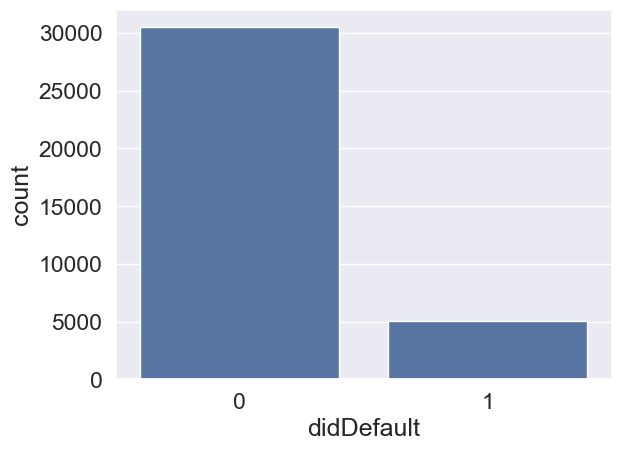

In [126]:
# Lets start by seeing what percentage of loan approved have defaulted
sns.countplot(x=df['didDefault'])
plt.show()

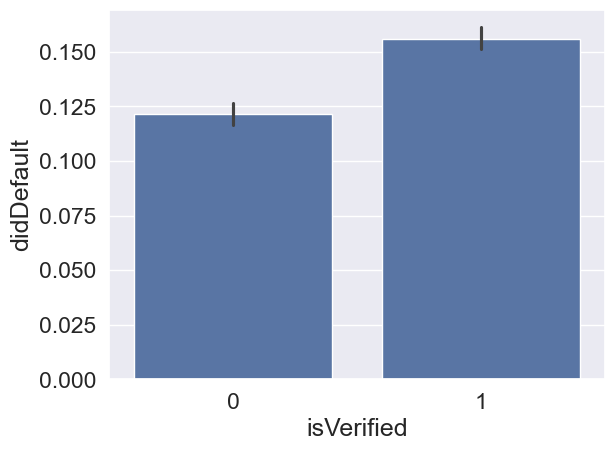

In [127]:
# Looks like about ~14% of overall applications defaulted. Now lets identified if the trend of default based on verification status
sns.barplot(data=df, x='isVerified', y='didDefault')
plt.show()

In [128]:
# Defining a common method to draw plots for identify default rate across different categories

def checkDefaultRateFor(attribute):
    # Identify default pattern across the given attribute
    # Total loan applications across given attribute
    plt.figure(figsize=(30,30))
    plt.subplot(221)
    sns.countplot(x=df[attribute], data=df, hue=attribute, legend=False, palette=("deep"))  
    # Defaults across given attribute
    plt.subplot(222)
    sns.barplot(x=attribute, y='didDefault', data=df, hue=attribute, legend=False, palette=("deep"))  

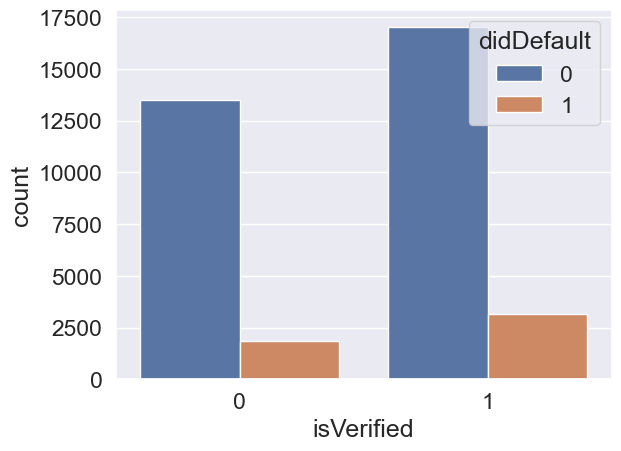

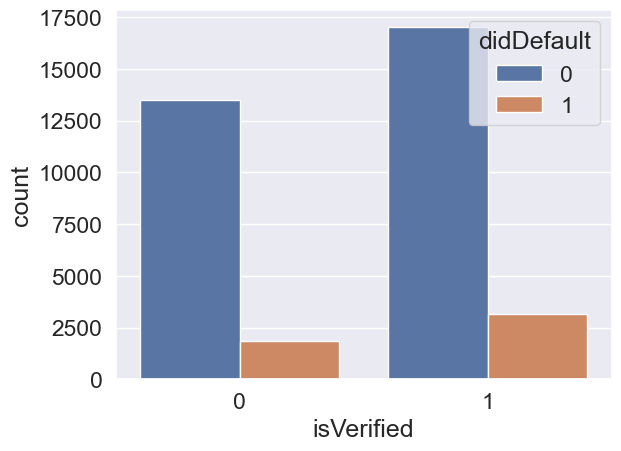

In [129]:
# Trying to identify if verification status of candidate has an impact on default
sns.countplot(x='isVerified',hue='didDefault',data=df)  
plt.show()
sns.countplot(x='isVerified',hue='didDefault', data=df), df.isVerified, 2, 2
plt.show()

#Below plot shows that verification status does not have a clear impact of default rate

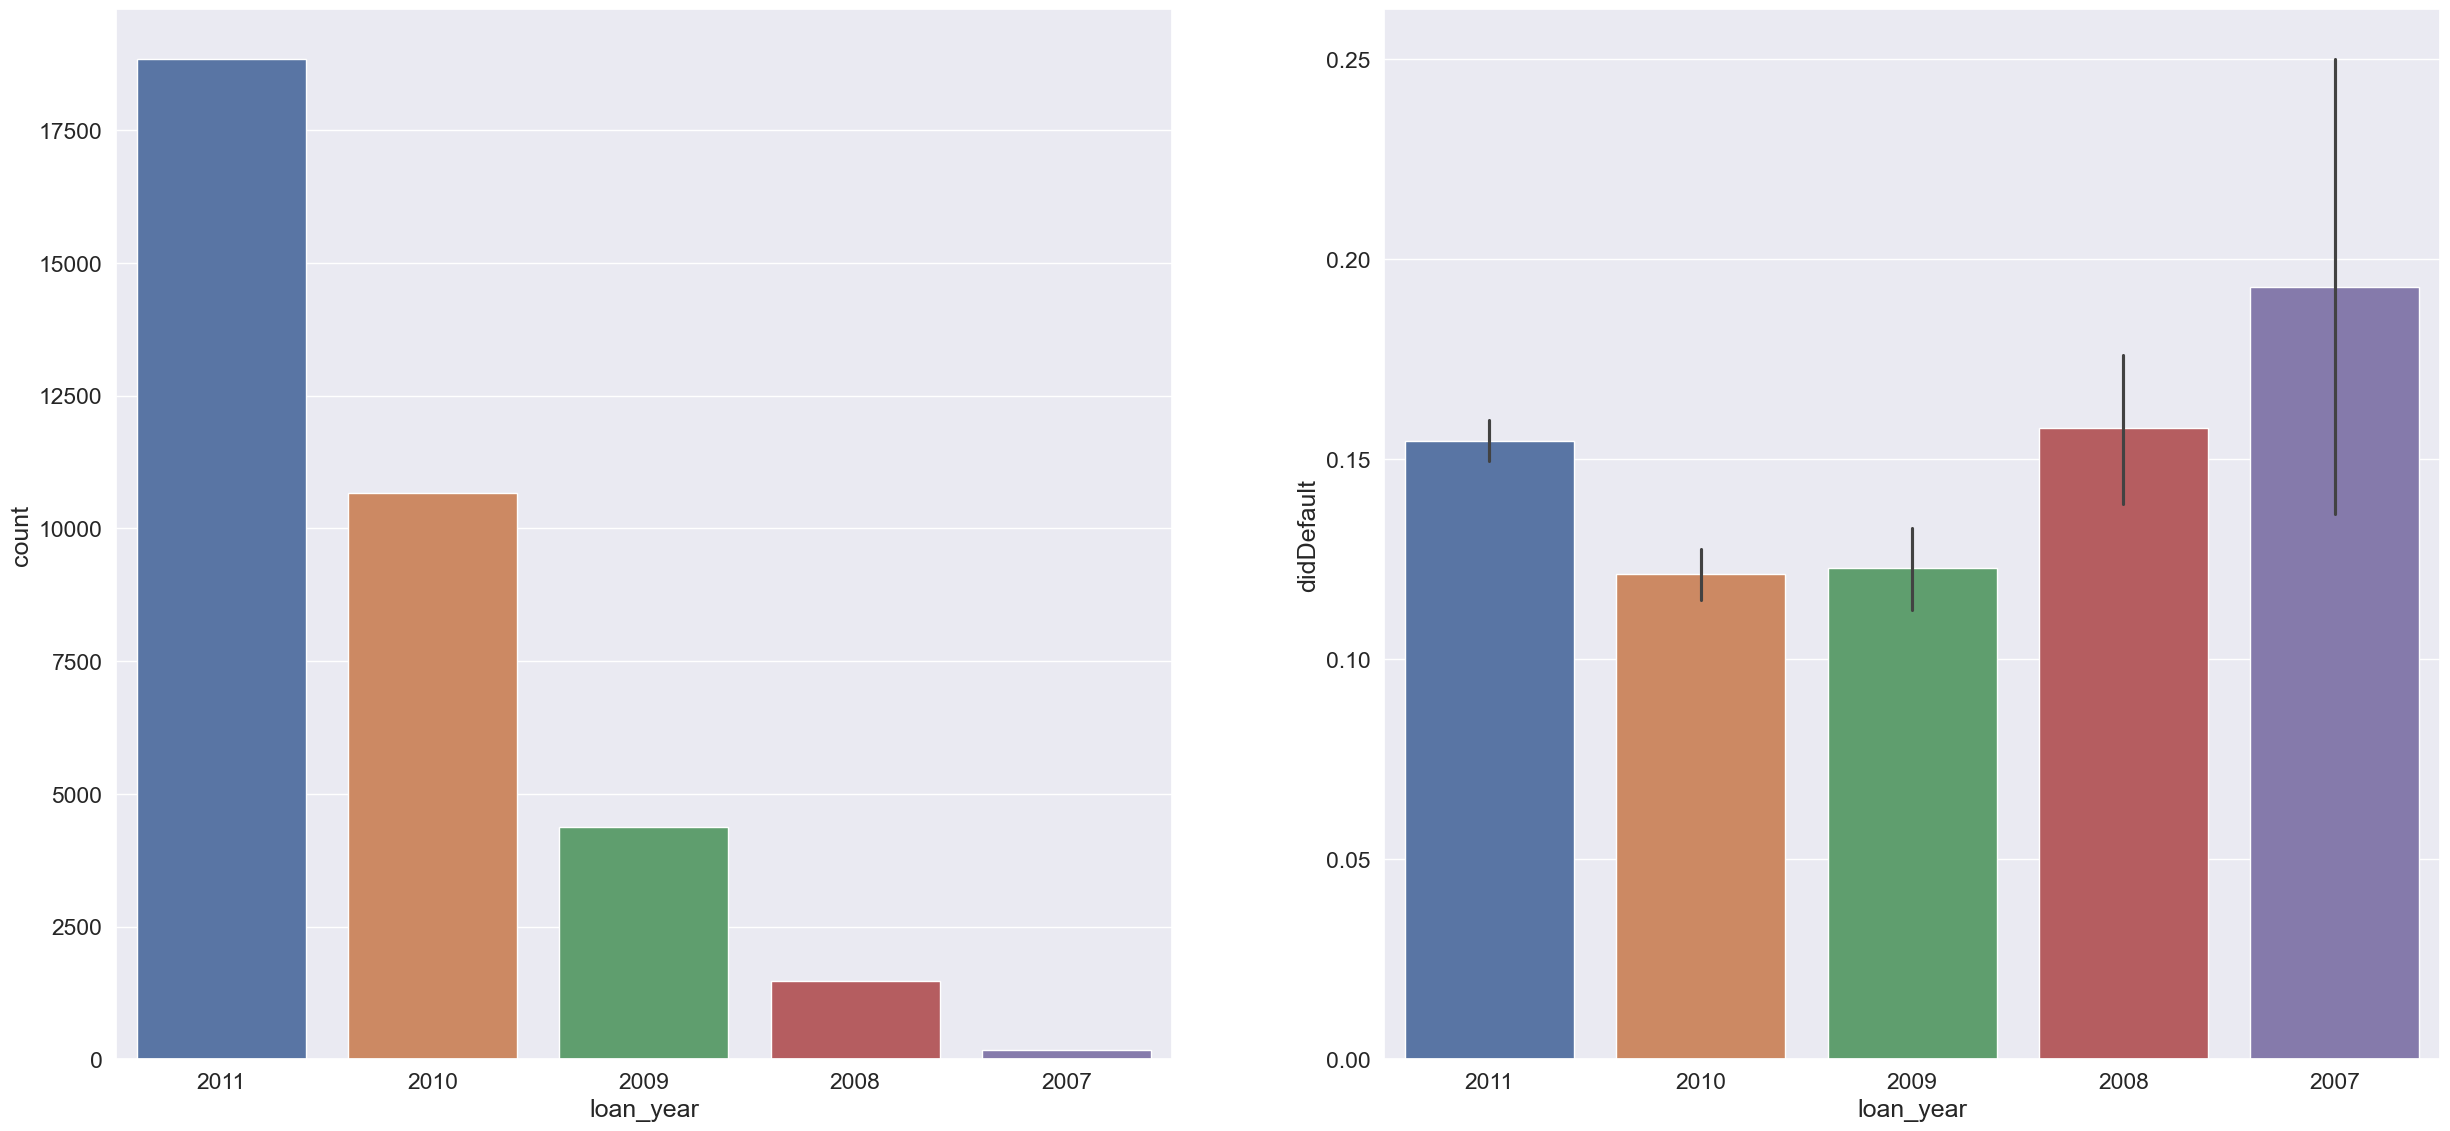

In [130]:
# Same can also be verified by taking correlation
checkDefaultRateFor('loan_year')
# This indicates an initial decrease in loan default but again a recent increase in 2011

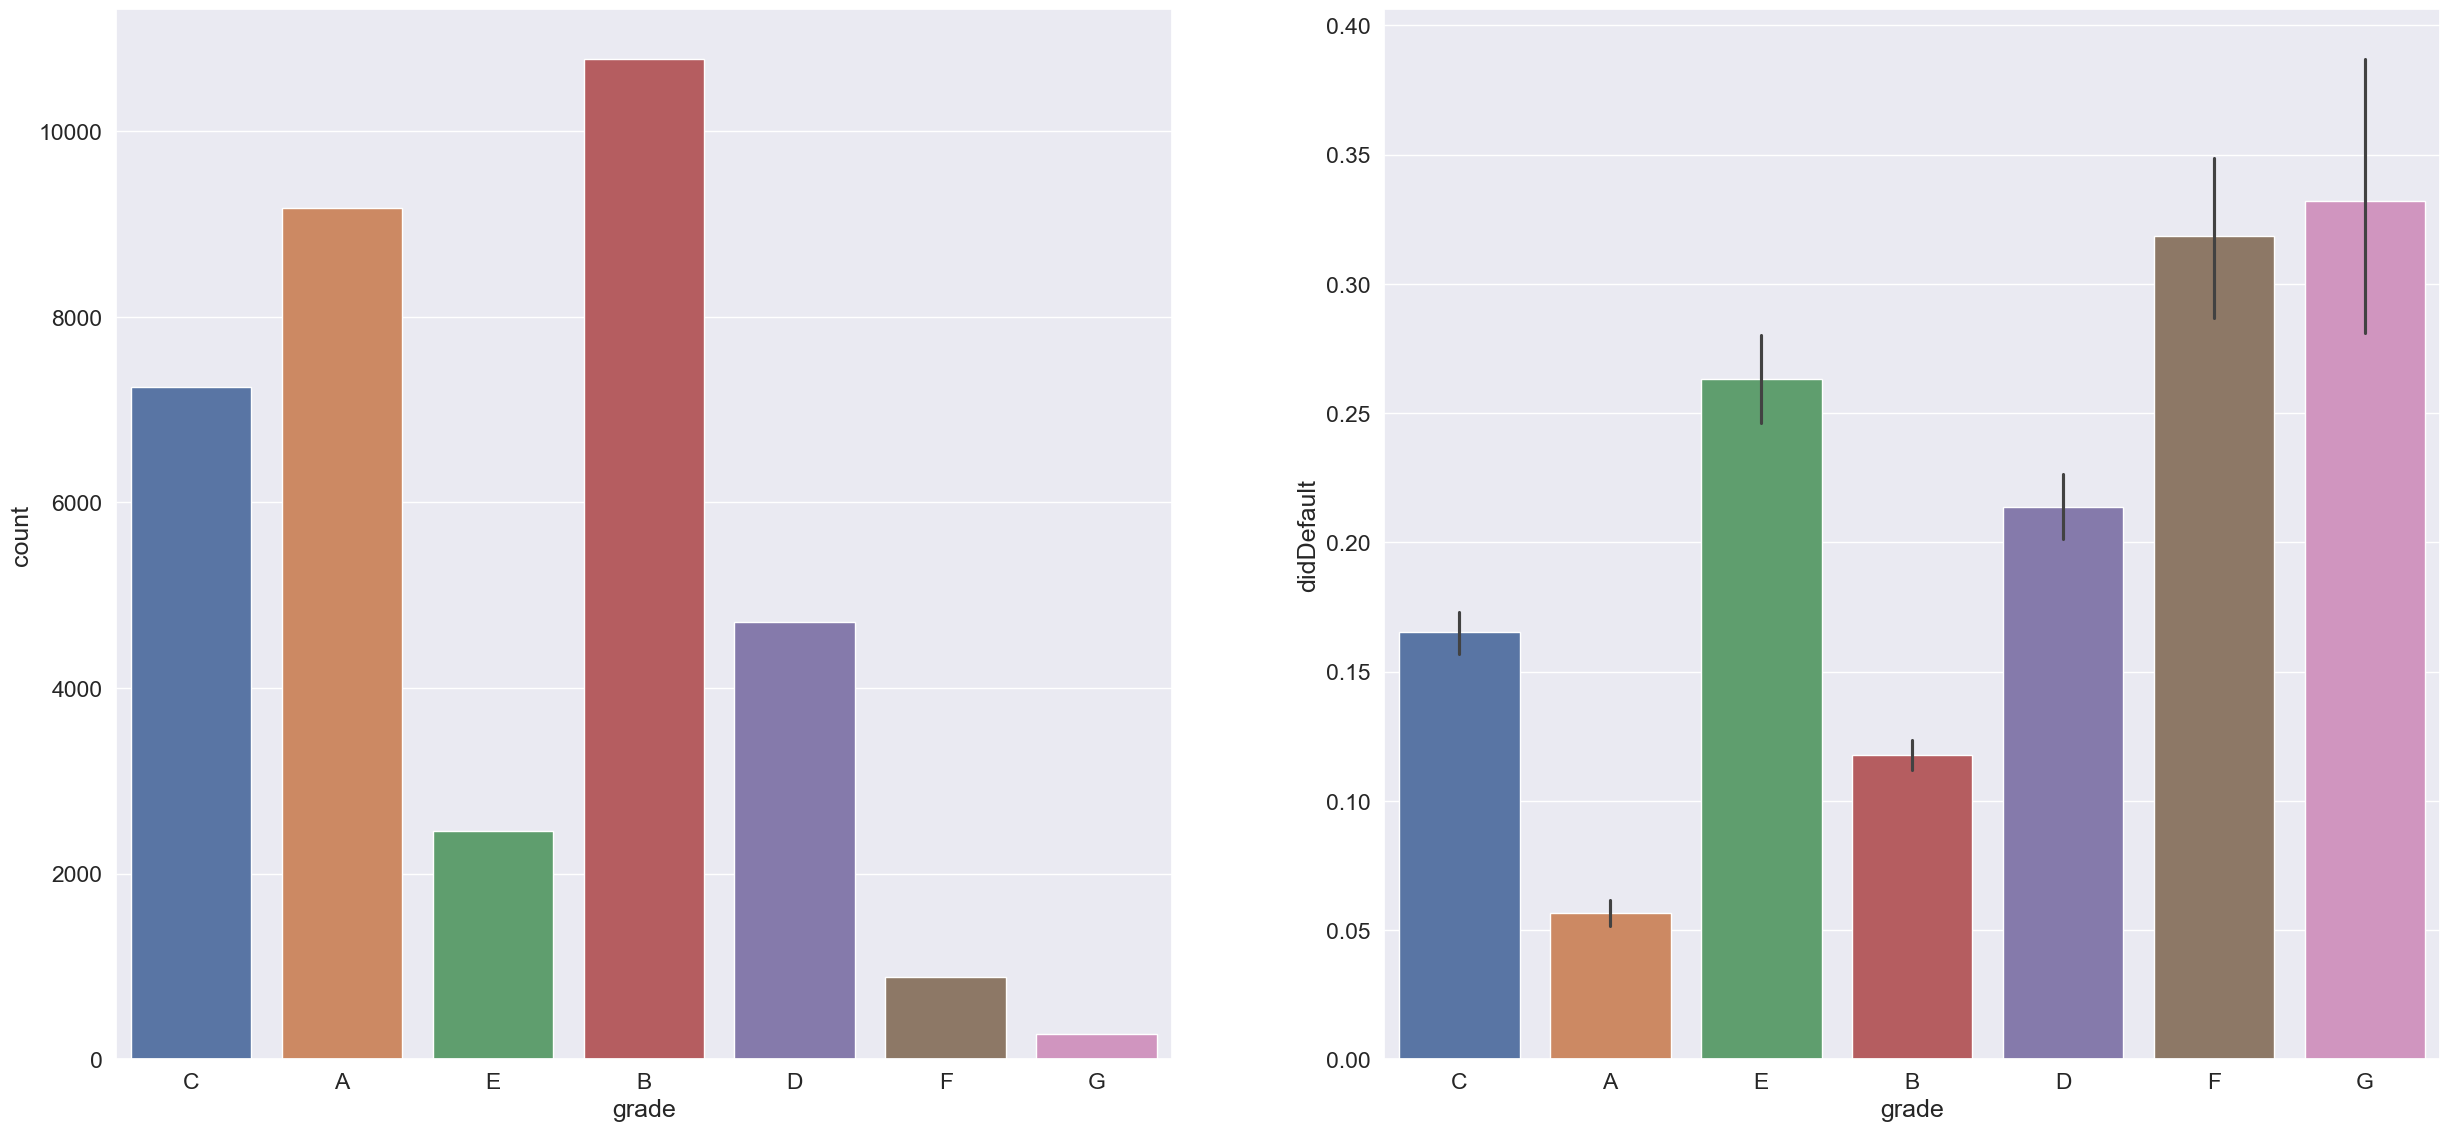

In [131]:
# Identify default pattern across loan_grade
checkDefaultRateFor('grade')

#TODO : See if we can sort x-axis A to G

# Below plot clearly indicate that chances of default go in the order of grade A,B,C,D,E,F,G 
# and number of loans approved go in reverse order becasue of the higher the grade, lower the chances of default 

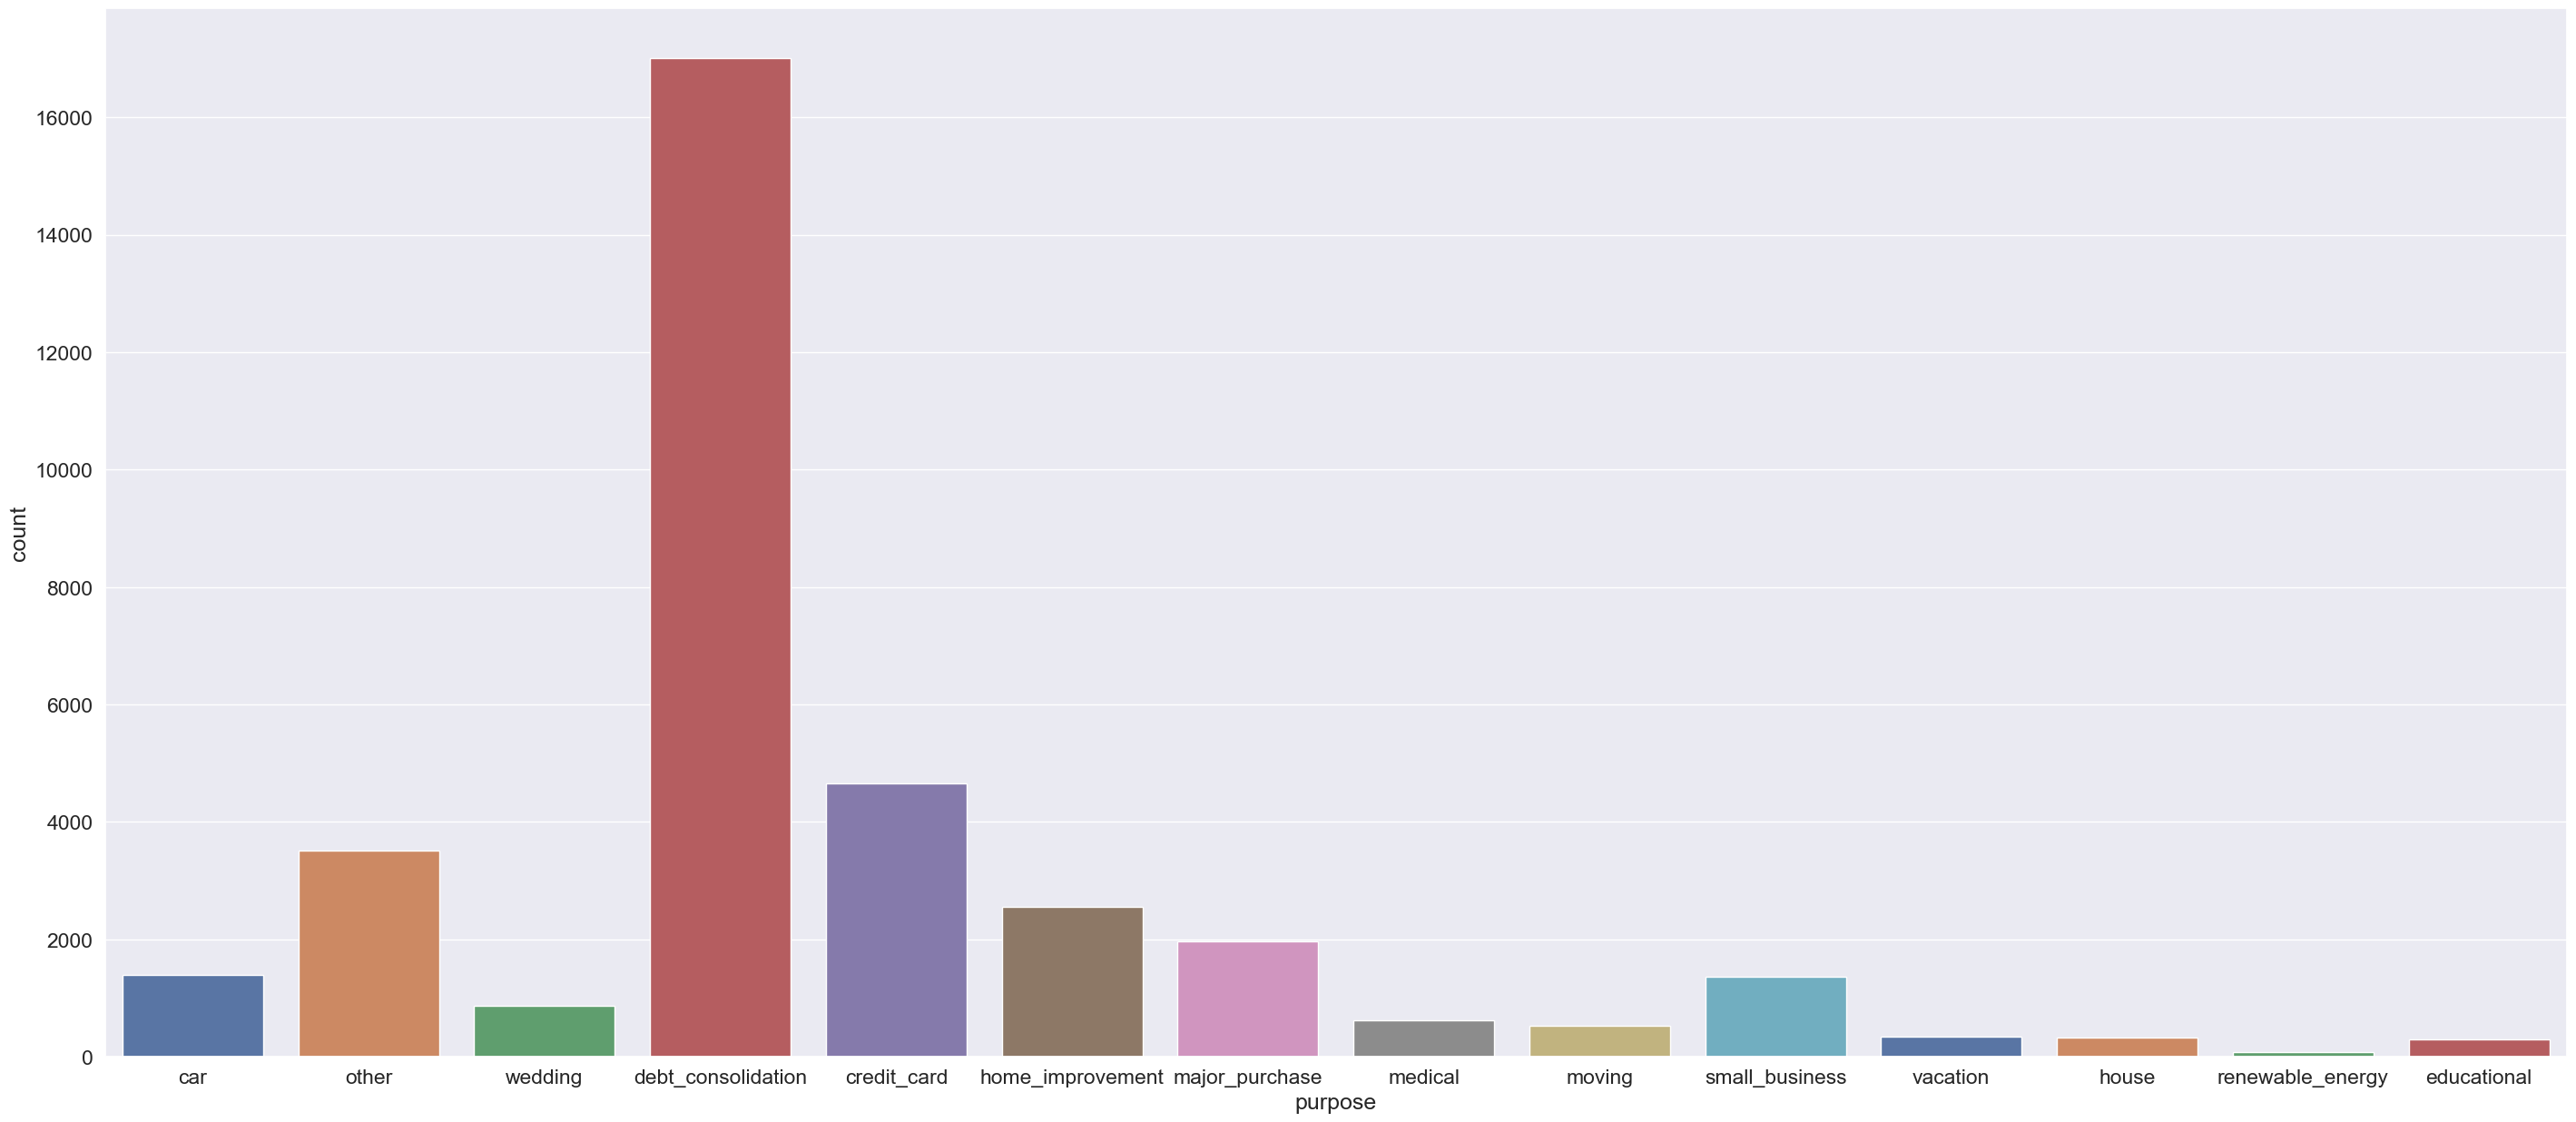

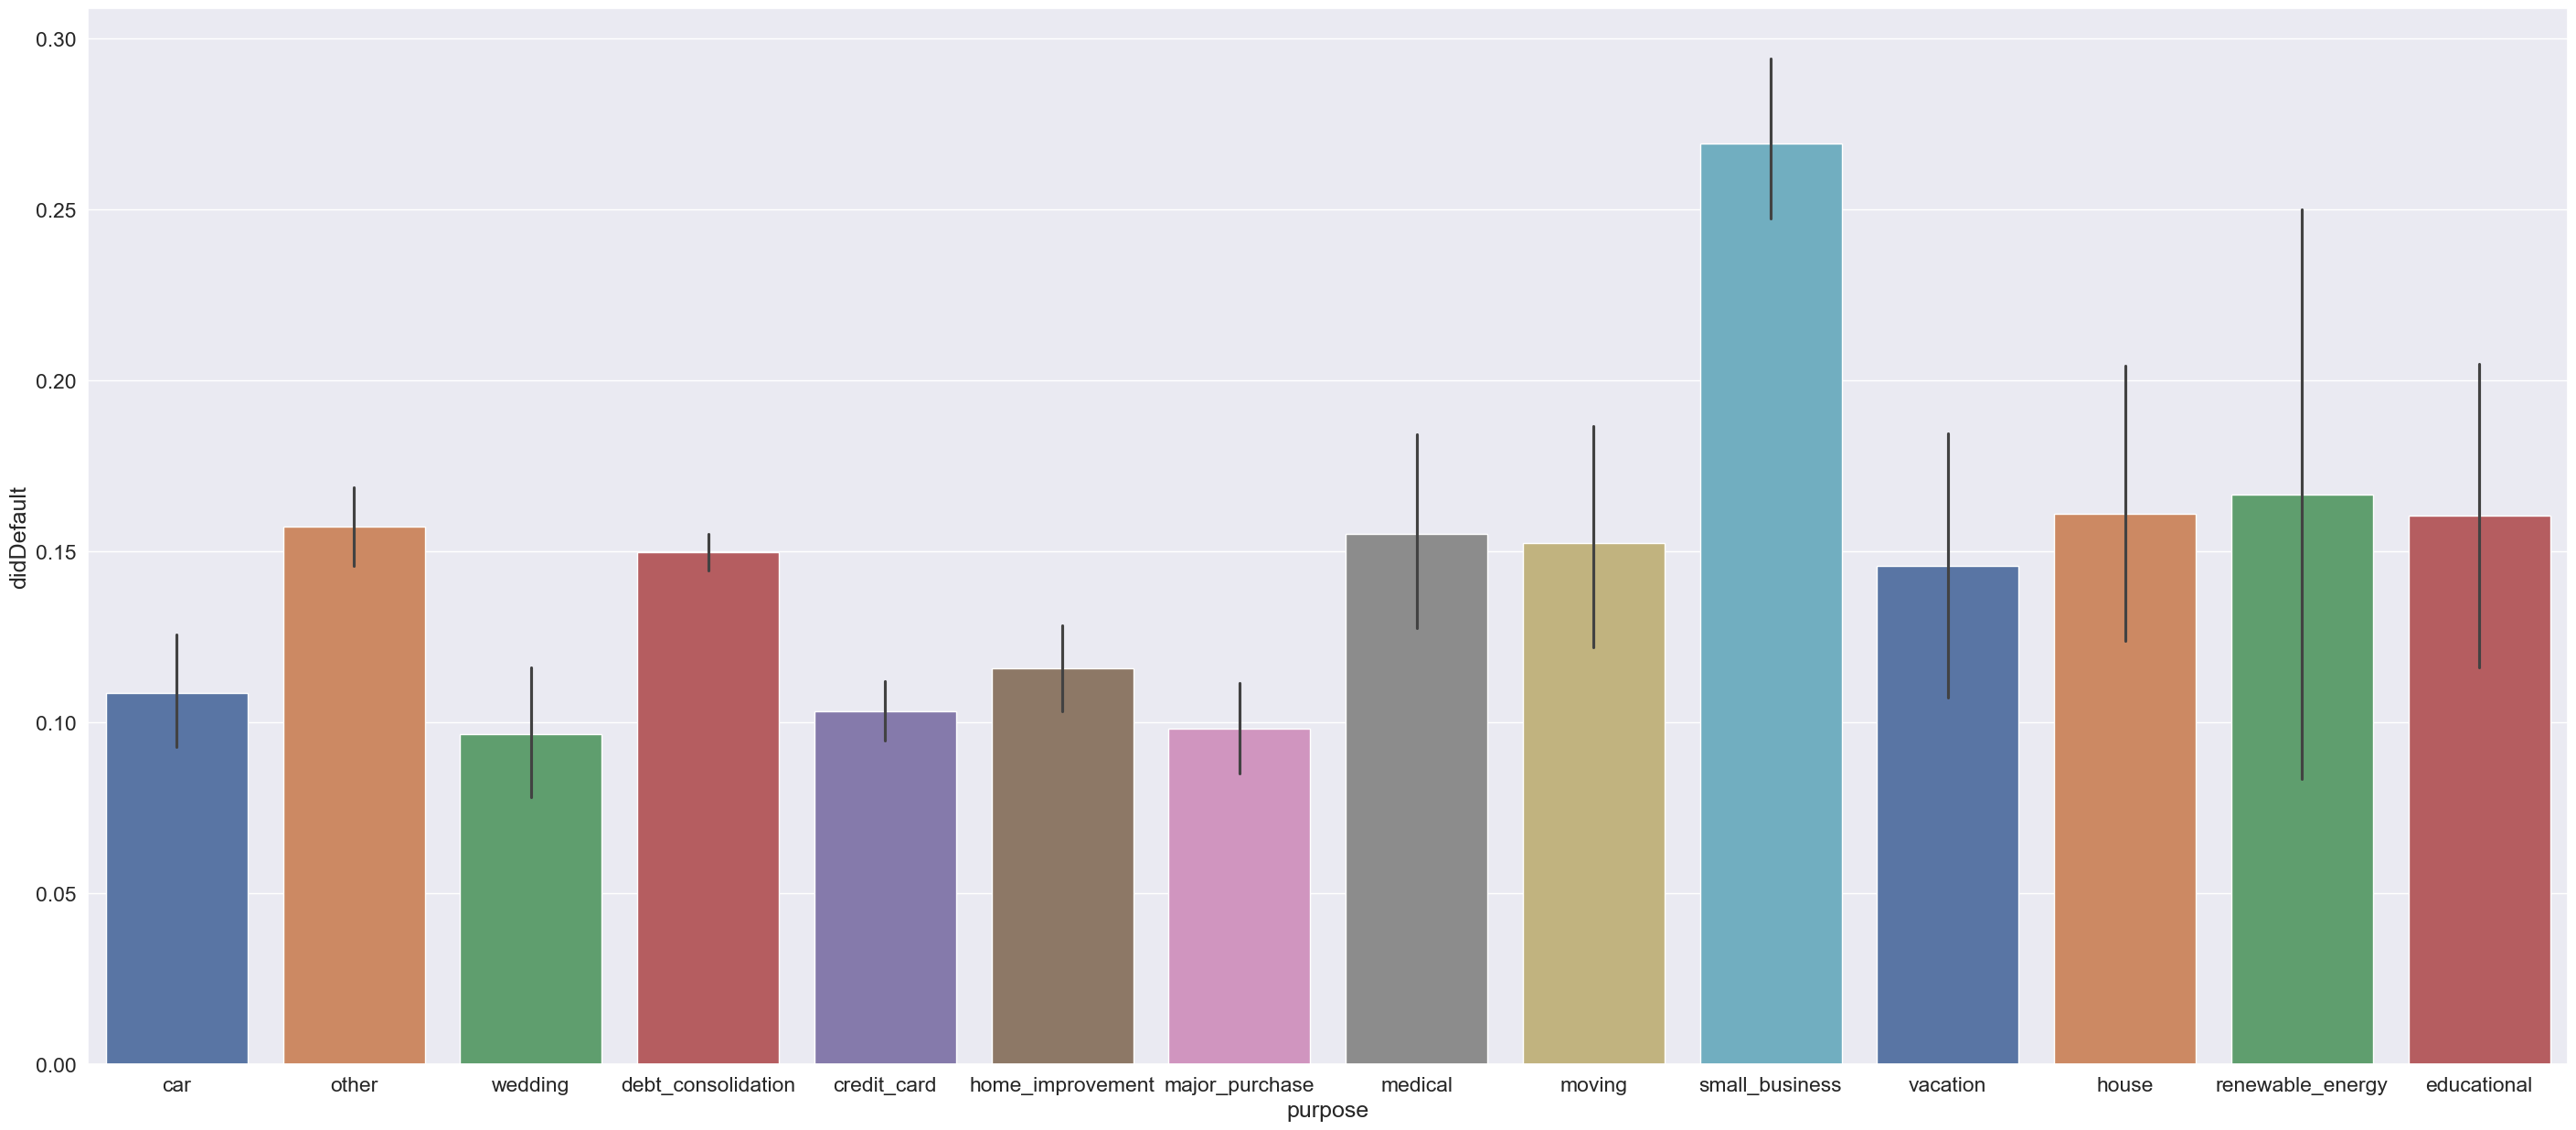

In [132]:
# Identify default pattern across purpose of loan
# Not reusing the code here to use different scaling for the graph size here
sns.set(font_scale=1.5) 
plt.figure(figsize=(35,15))
sns.countplot(x=df['purpose'], data=df, hue='purpose', legend=False, palette=("deep"))  
plt.show()
plt.figure(figsize=(35,15))
sns.barplot(x='purpose', y='didDefault', data=df, hue='purpose', legend=False, palette=("deep"))  
plt.show()




# Below plot indicates that 
# 1. Max loan are taken by category 'debt_consolidation'
# 2. Small Business depict highest default rate

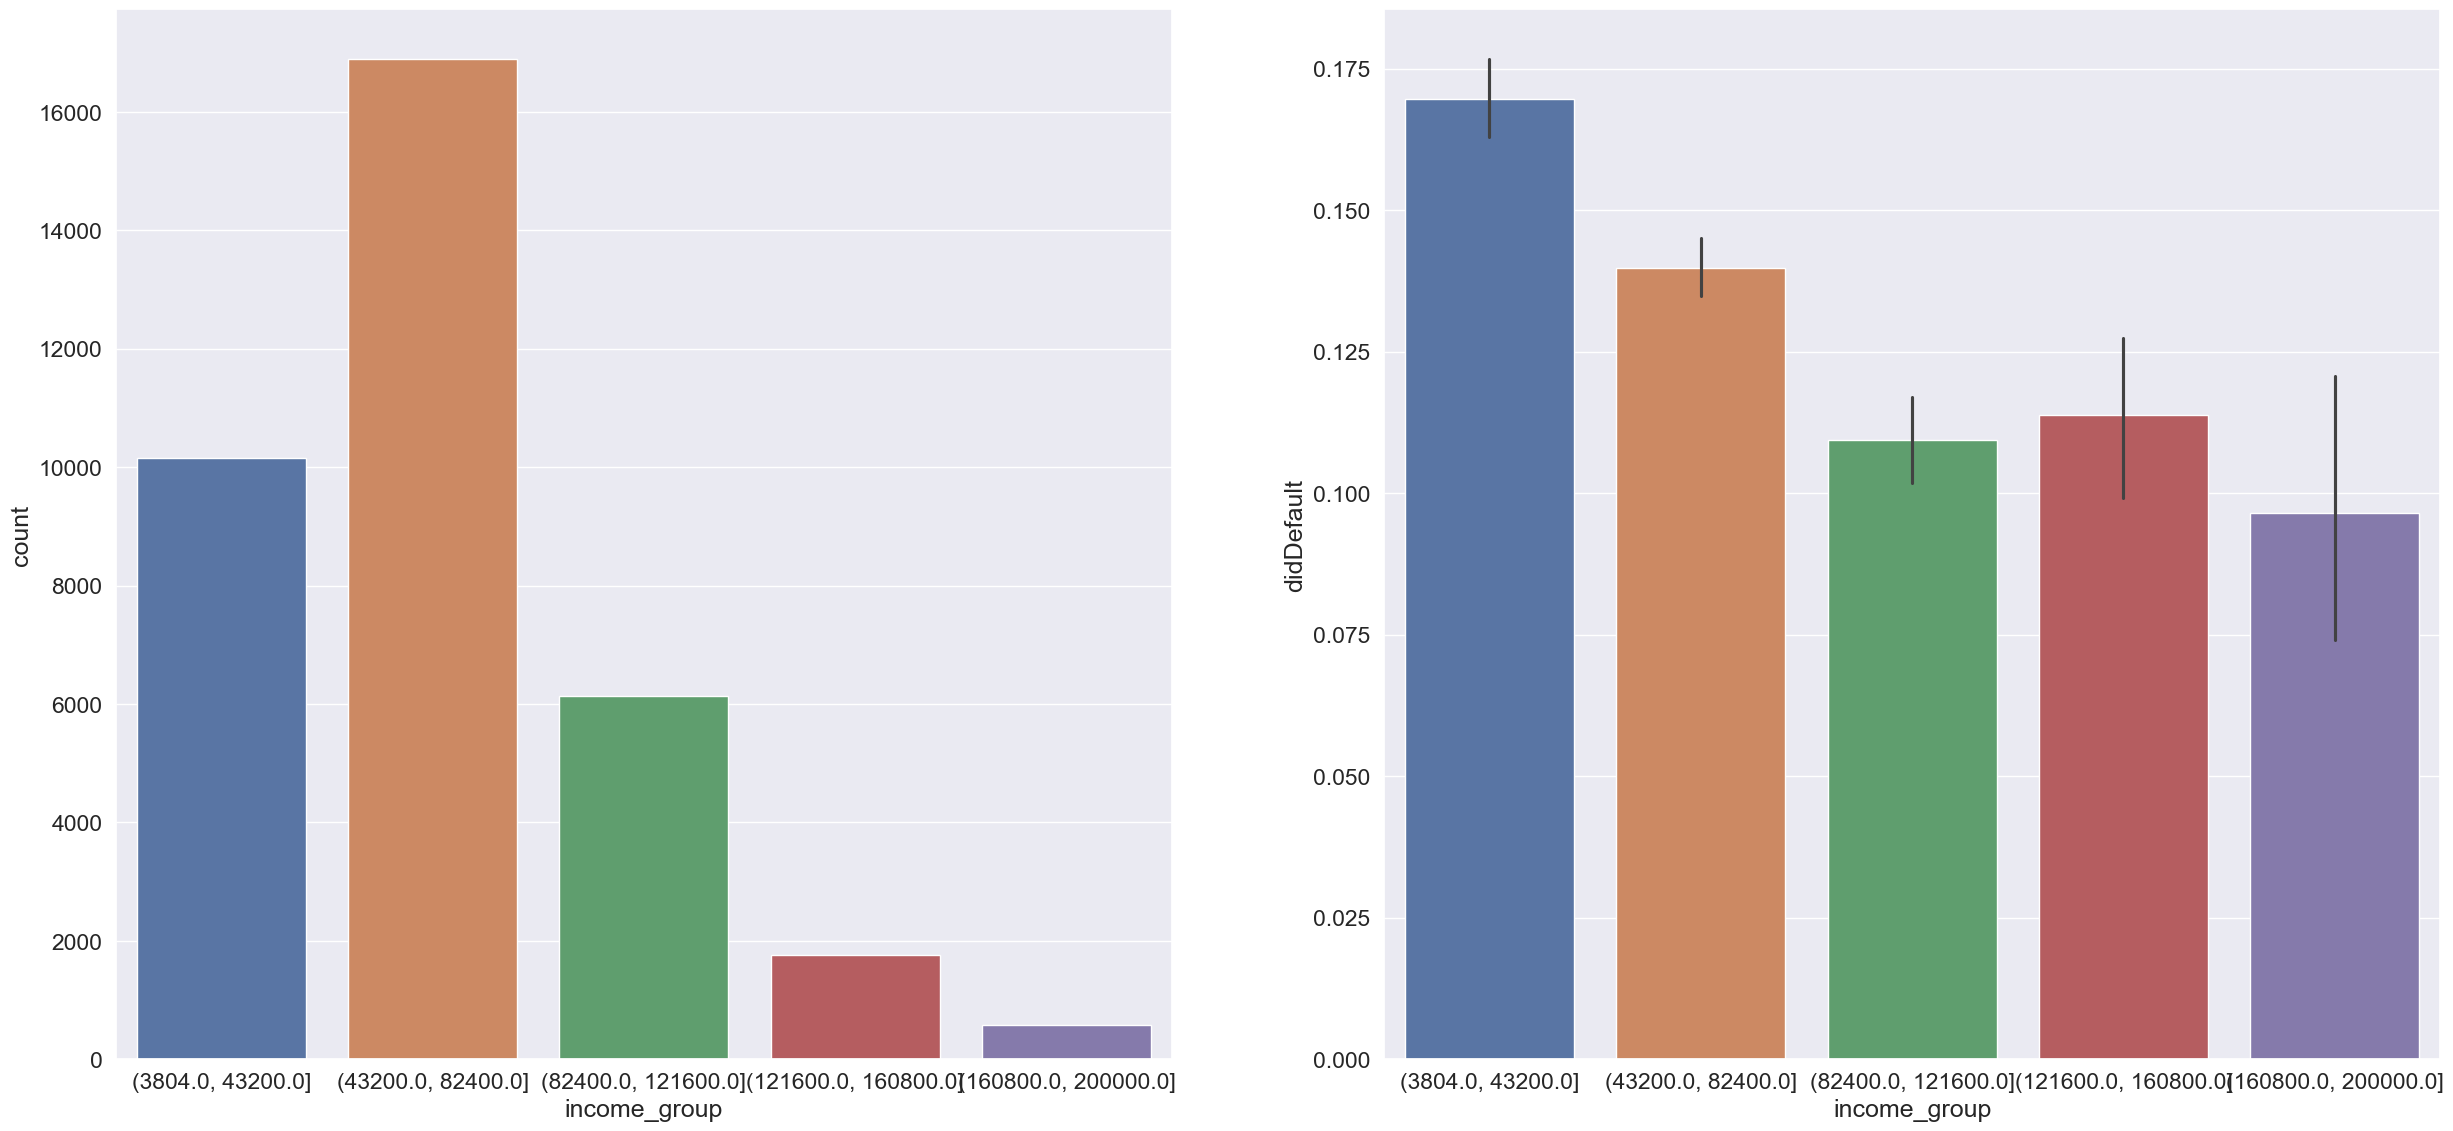

In [133]:
# Identify default pattern across loan_grade
checkDefaultRateFor('income_group') 

# Below plot indicates that 
# 1. Max loan are given to Salary range 43200 - 82400
# 2. Low salaries <= 43200 have highest default rate
# 3. Default rate reduces with salary increase depicting an almost stable trend at 11% after salary higher than 82400

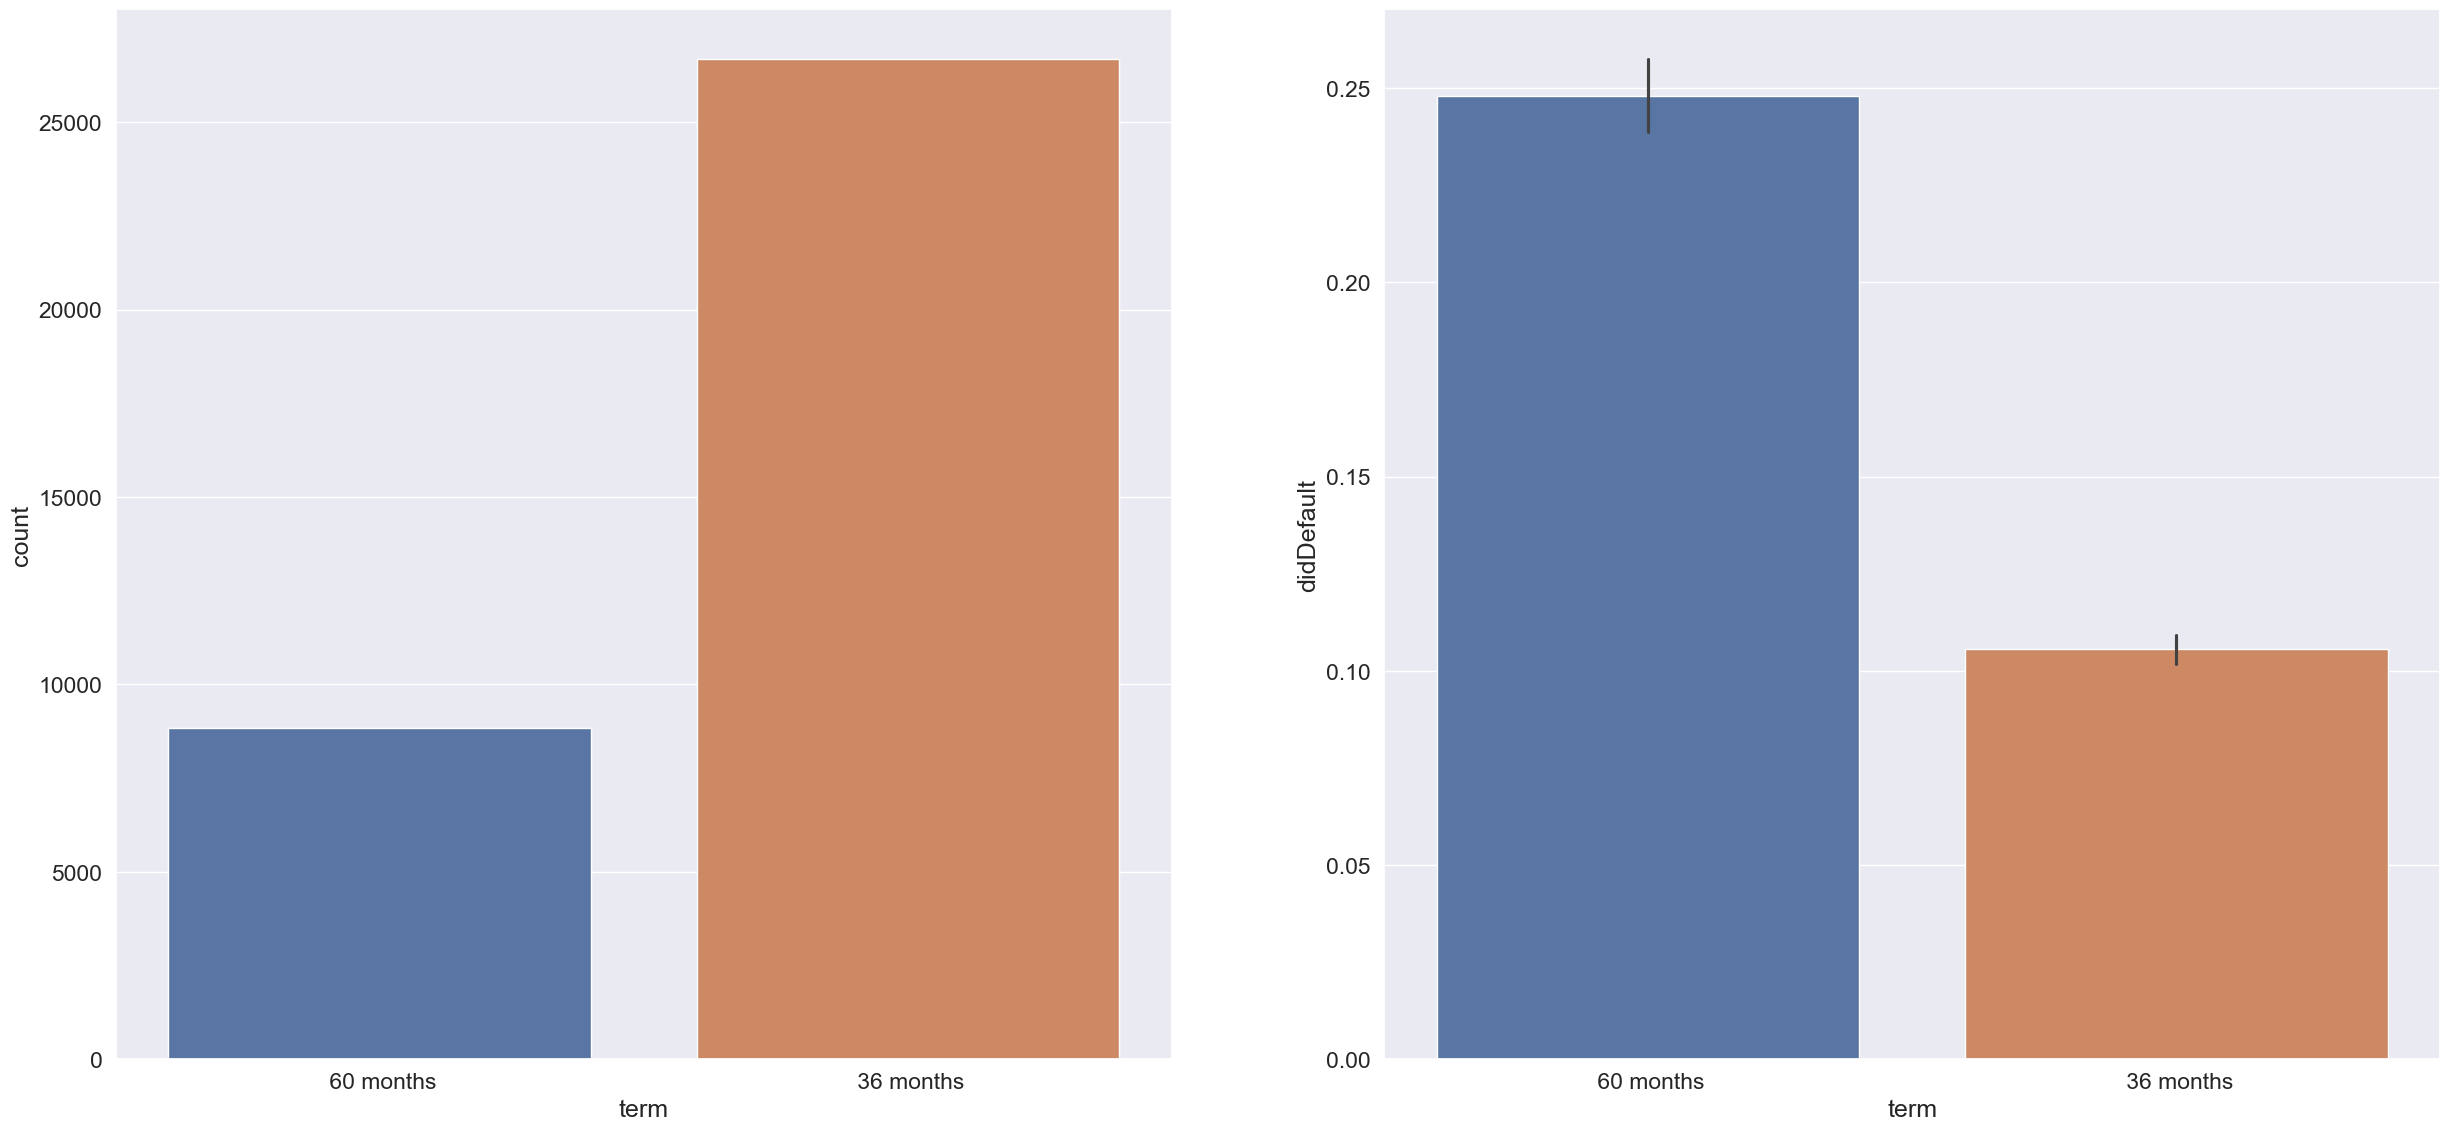

In [134]:
# Identify default pattern across loan term
checkDefaultRateFor('term') 

# Below plot indicates that 
# 1. Majority loans taken are for 36 months terms #Add exact percentage
# 2. Higher default rate for 60 months term

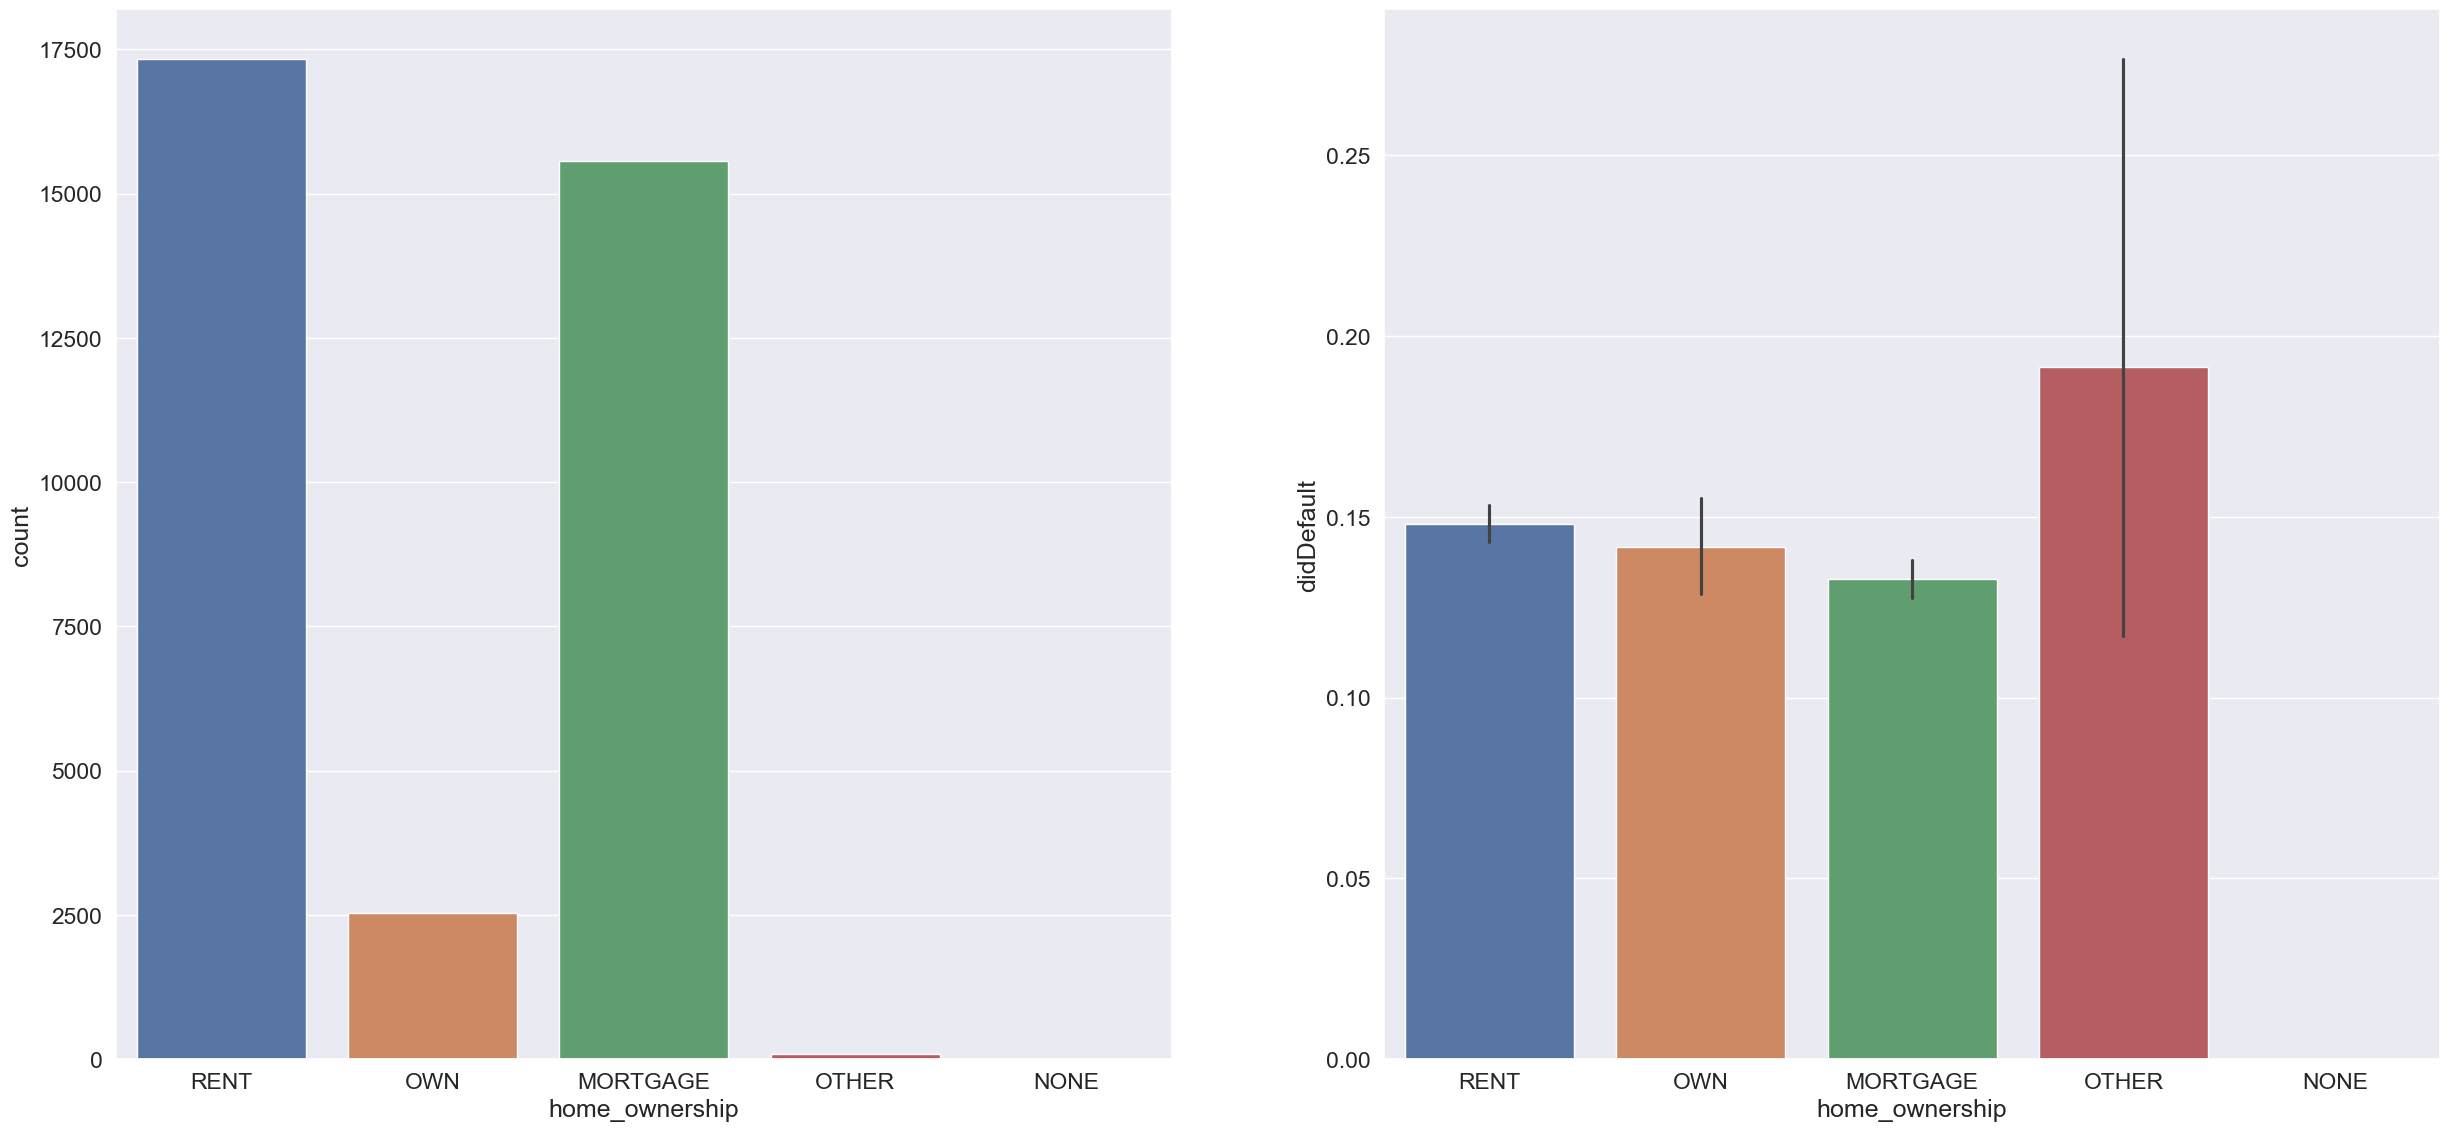

In [135]:
# Identify default pattern across home ownership
checkDefaultRateFor('home_ownership')   

# Below plot indicates that Category - Others (probably the ones whose home_ownership is not known have higher default rate

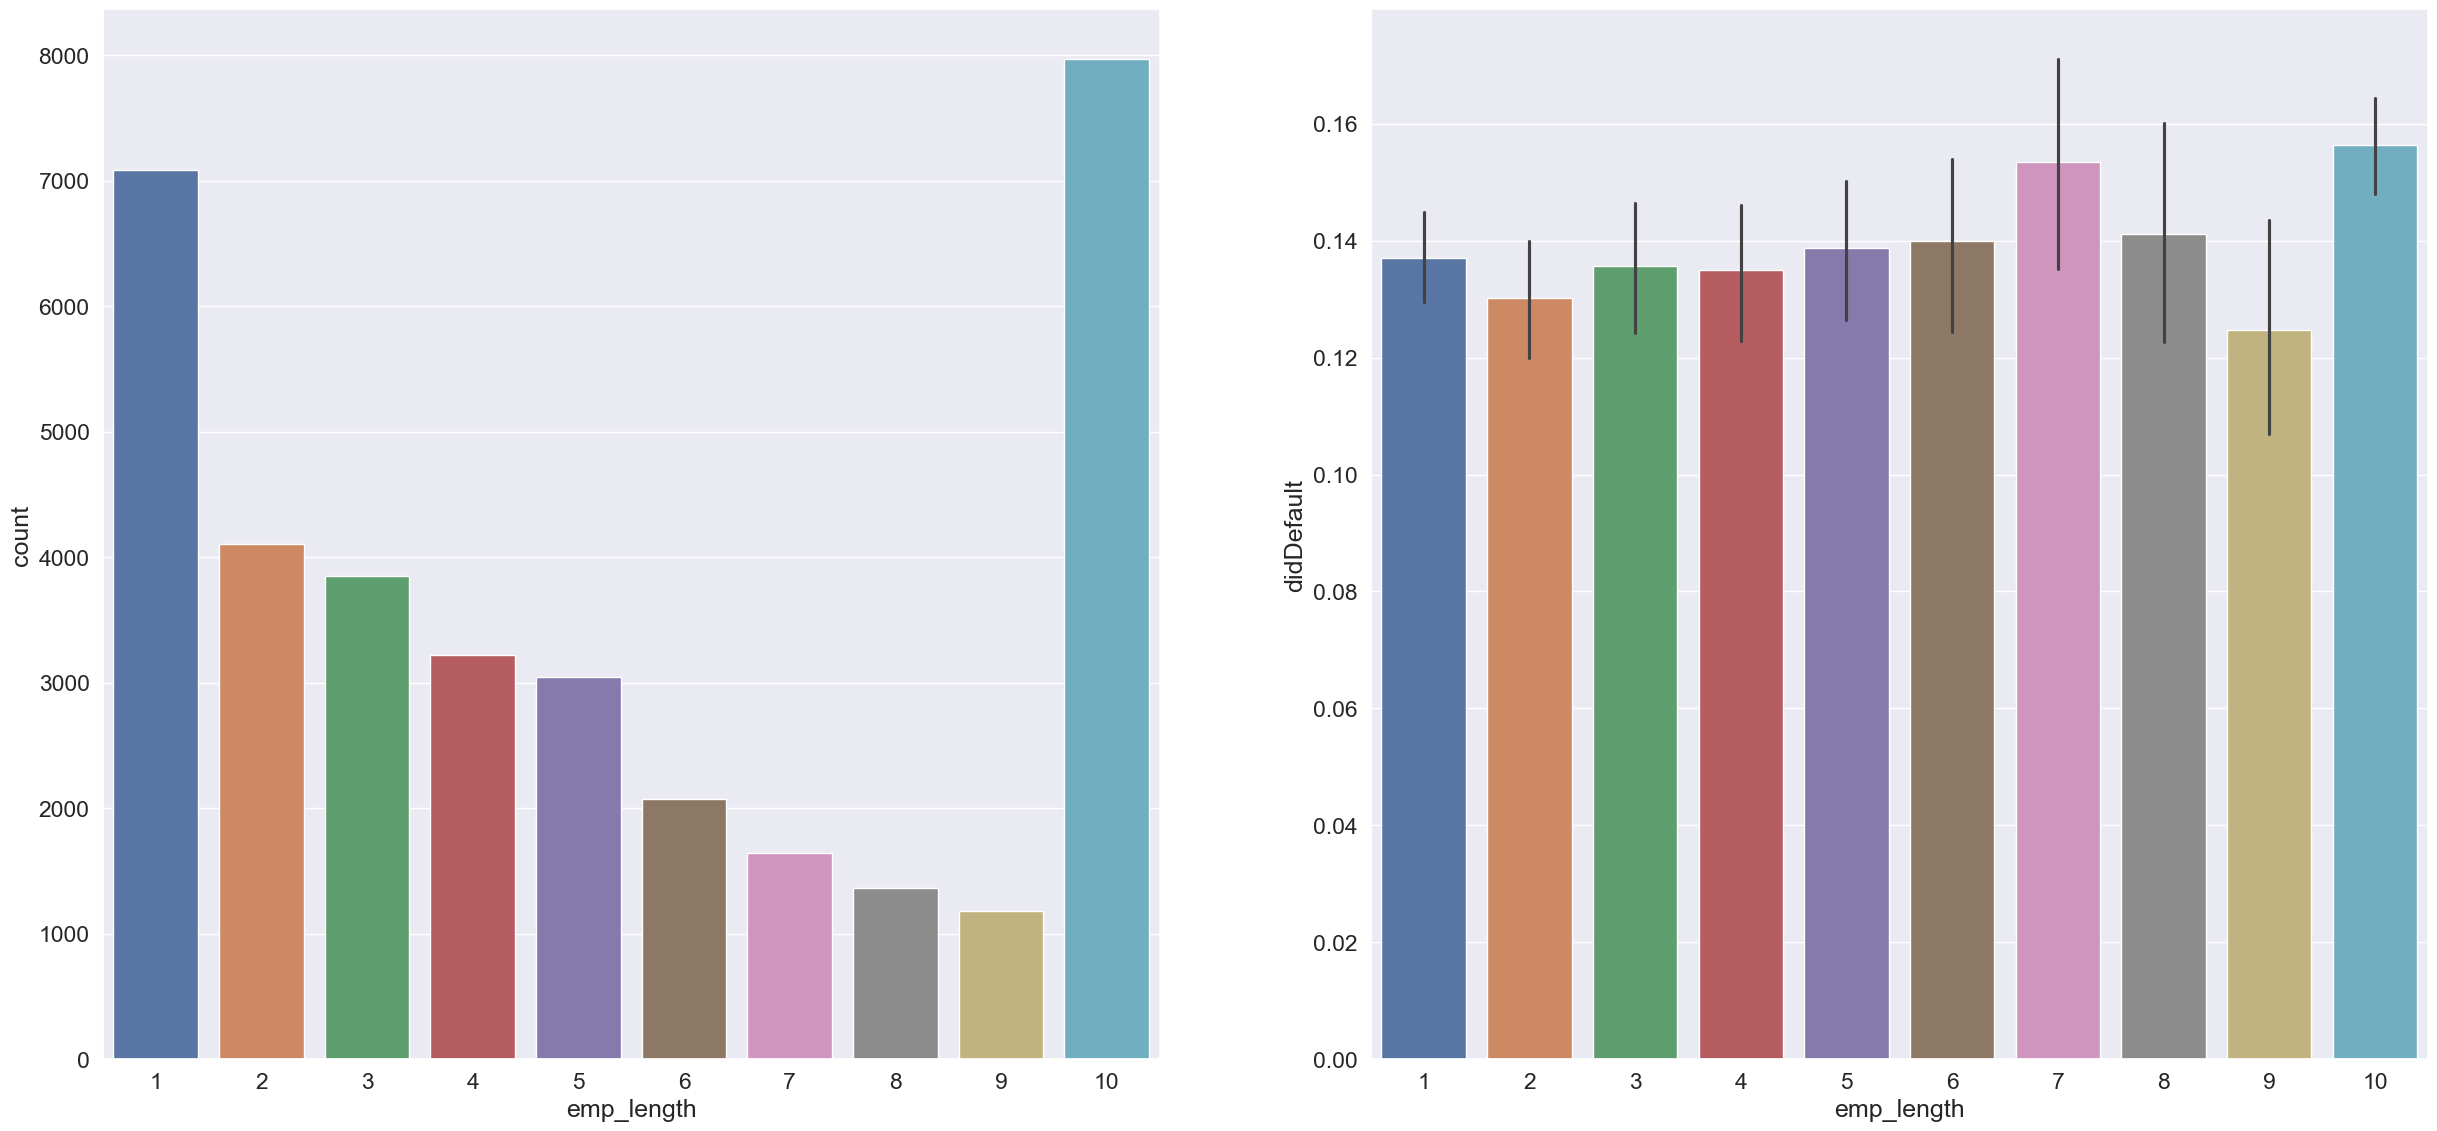

In [136]:
# Identify default pattern across employement length
checkDefaultRateFor('emp_length')   

# Below graph indicates that 
# 1. Majority of the loans are taken by cadidates with employement length <=1 year or >=10 years
# 2. There is no clear pattern of default rate for any particular employement length


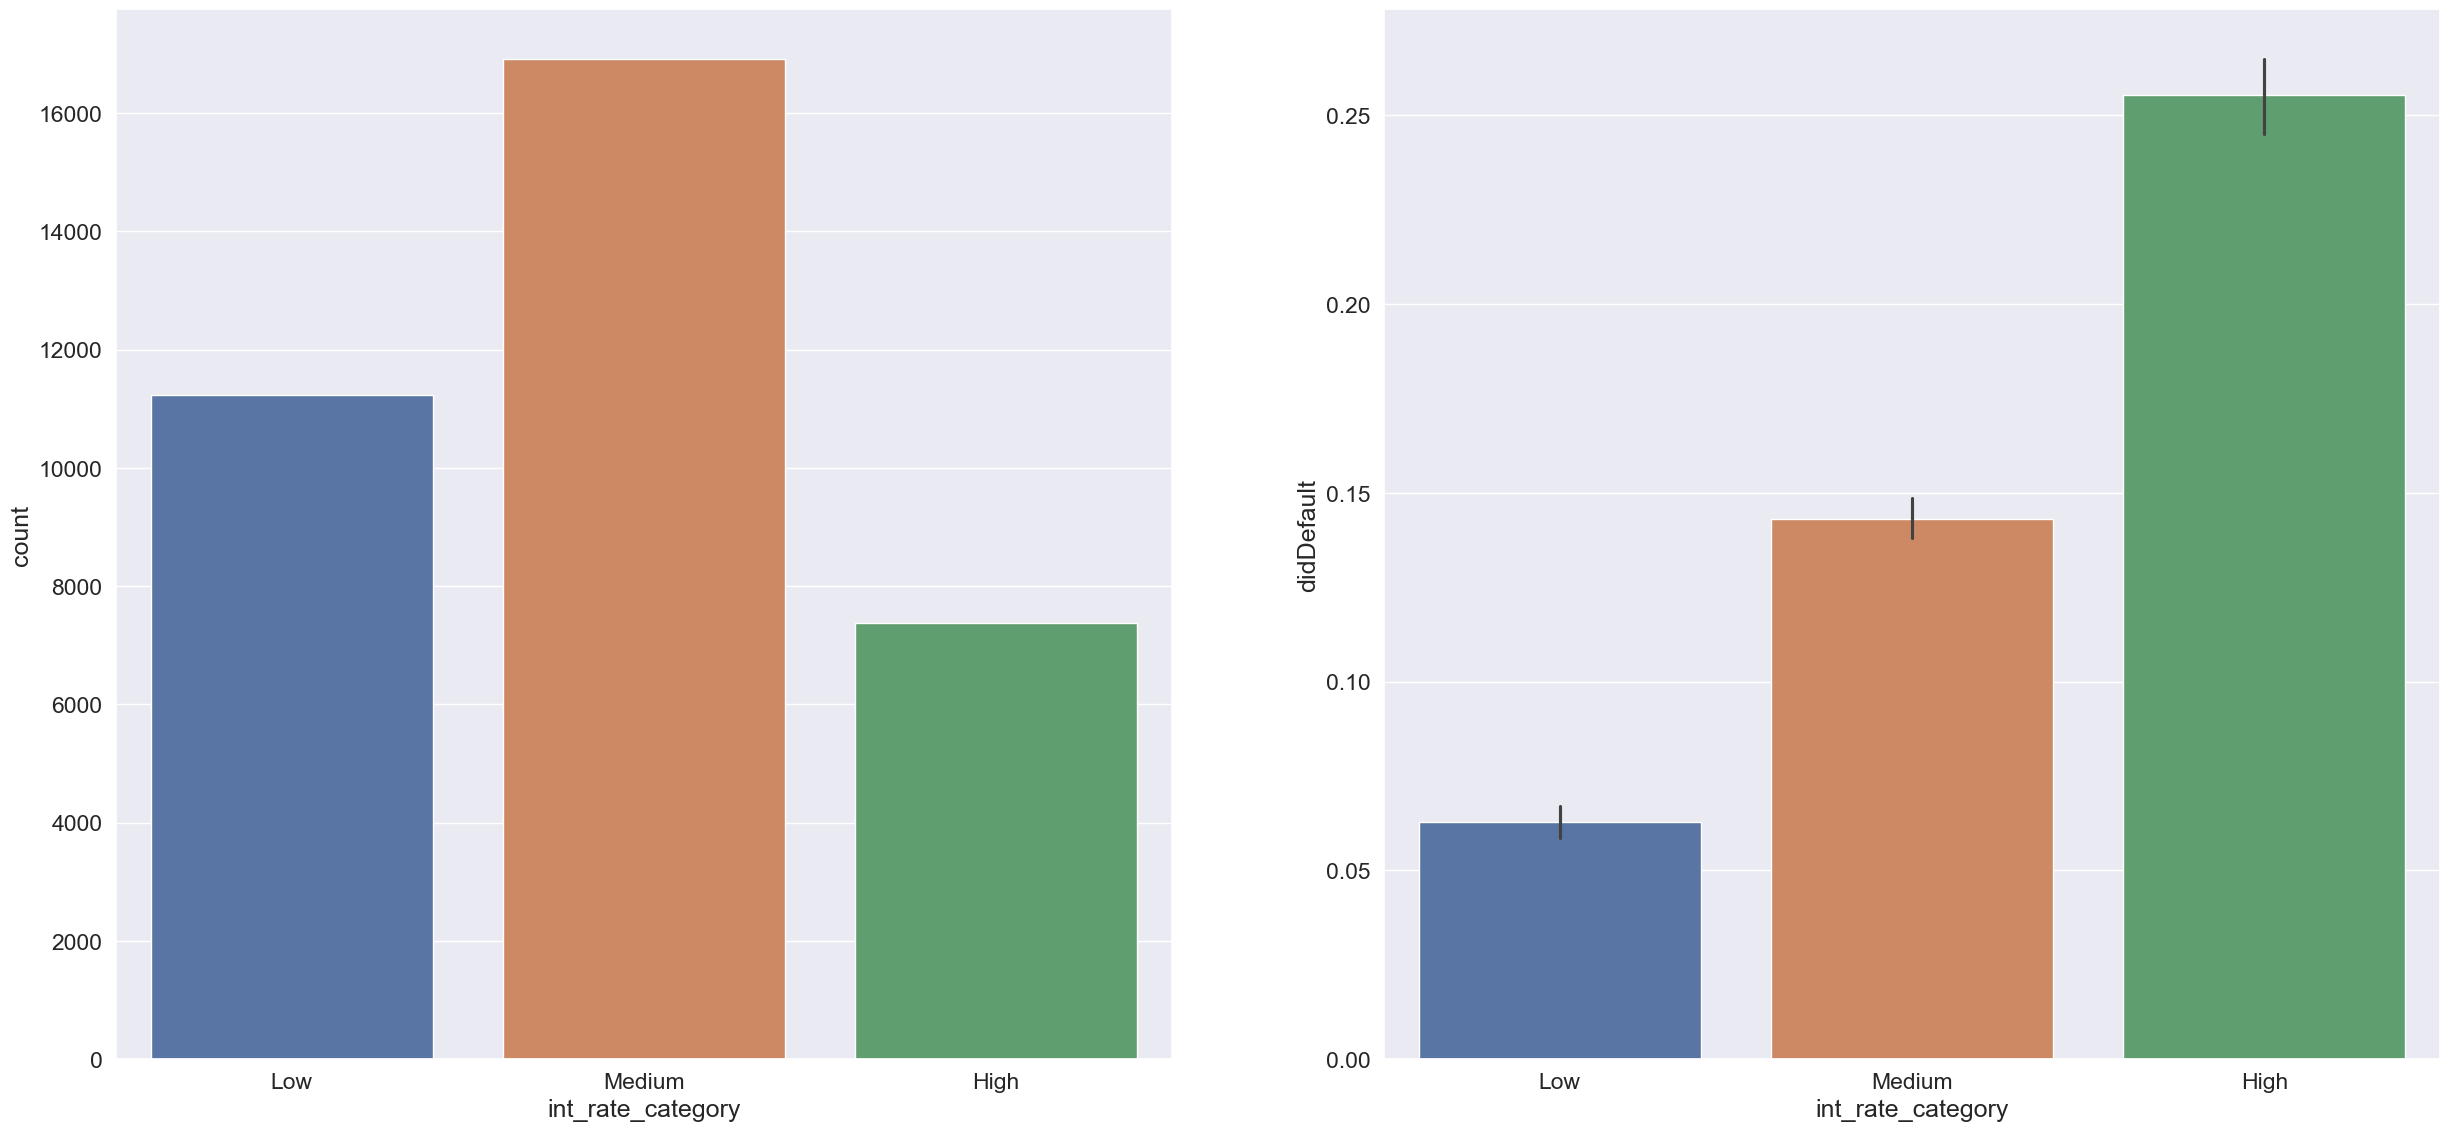

In [137]:
# int_rate_category correlation with default rate
checkDefaultRateFor('int_rate_category')

# Below graph indicates that
# 1. Medium interest rates are more offered than low & high
# 2. Customers with high interest rate default the most

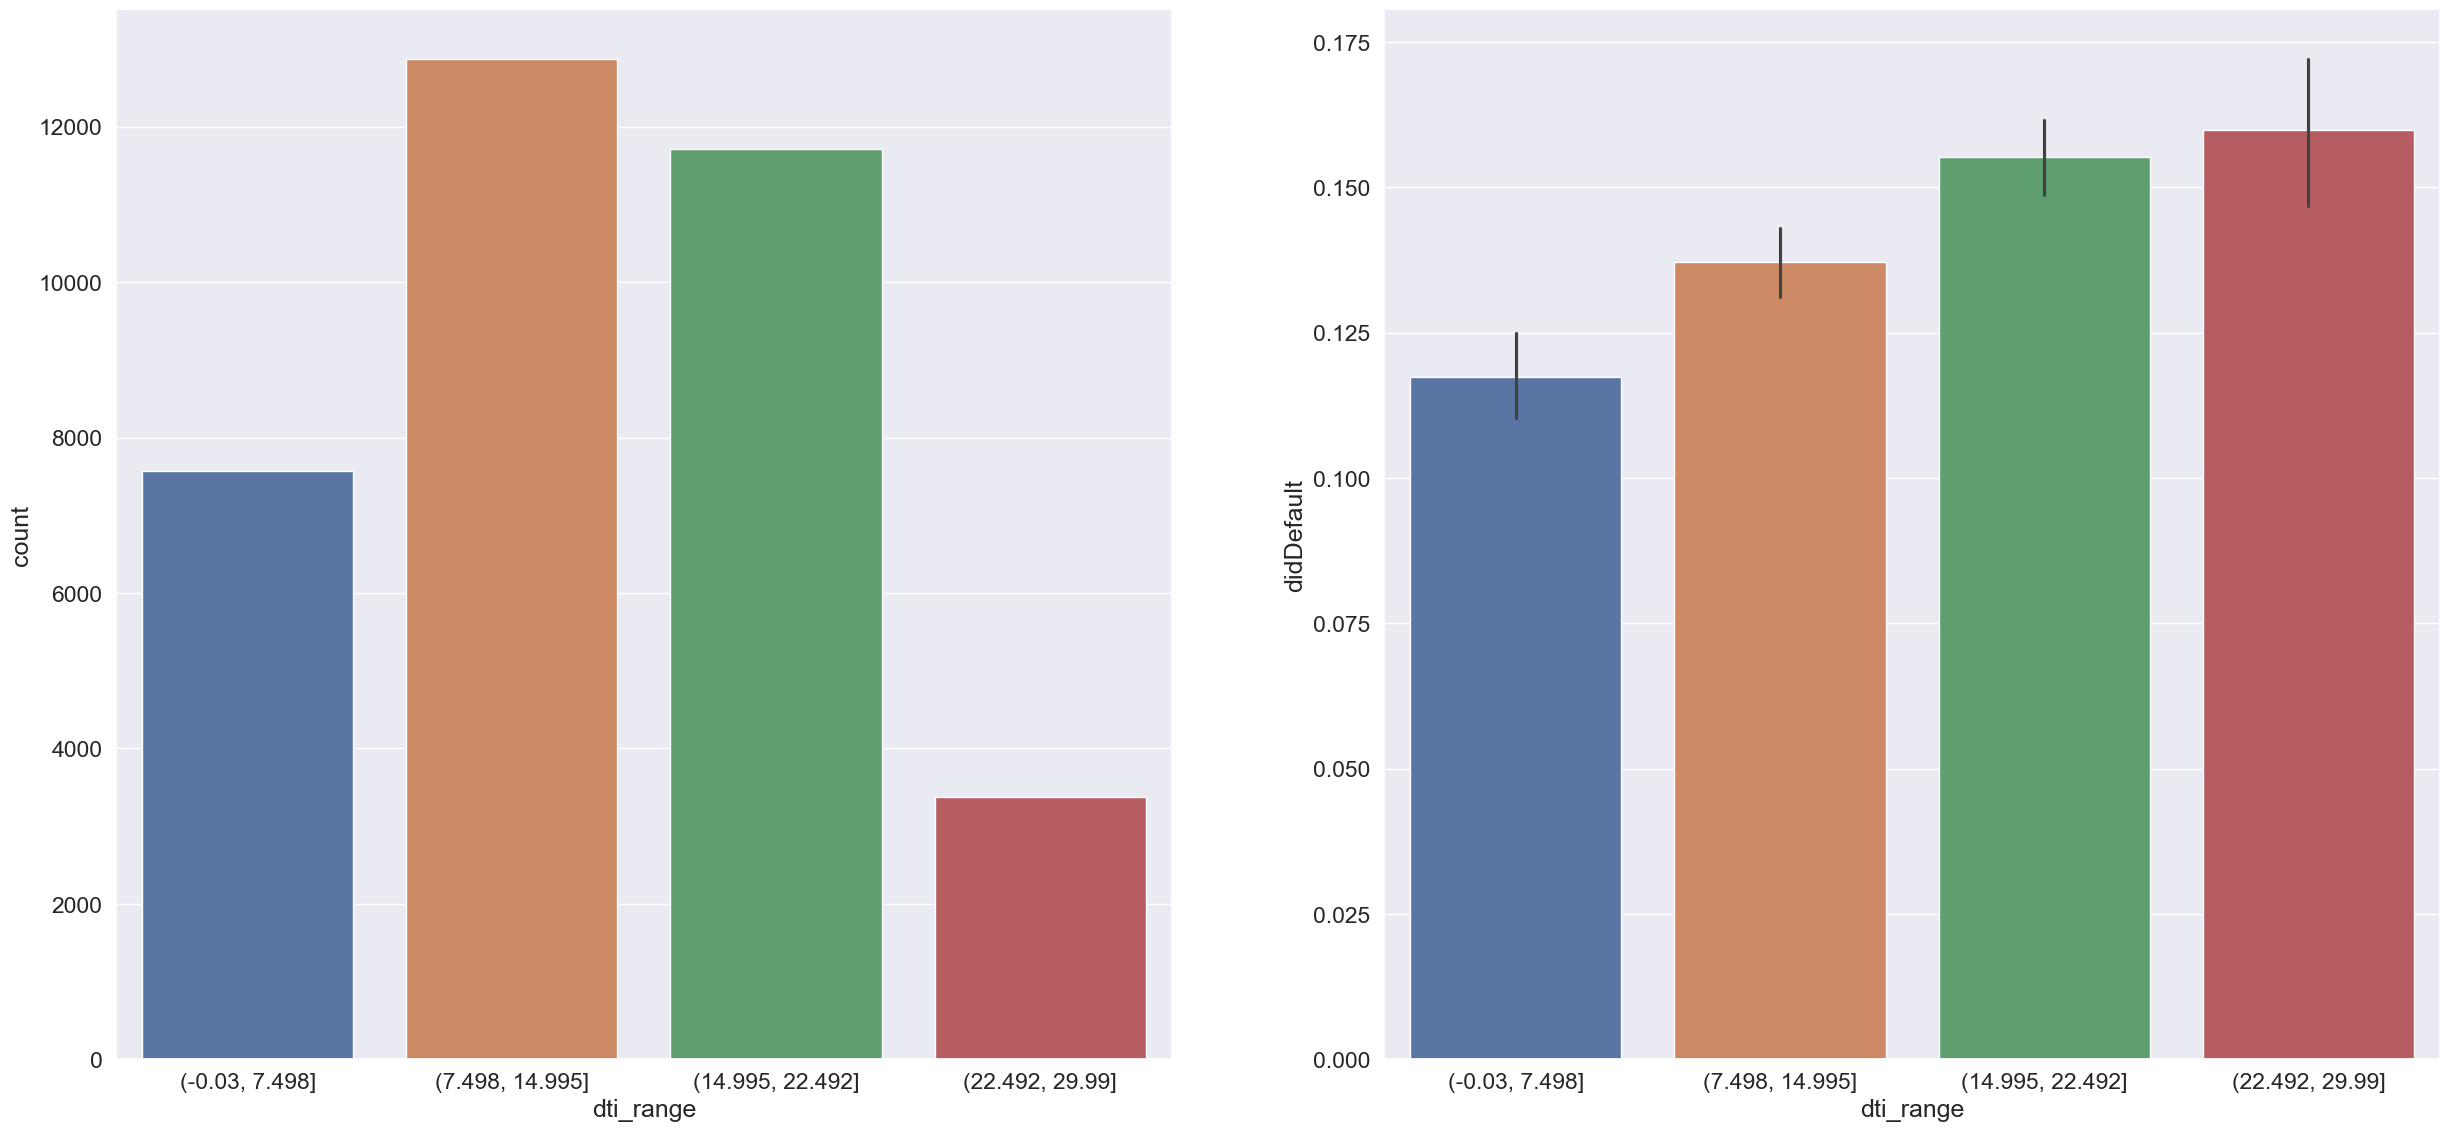

In [138]:
# int_rate_category correlation with default rate
checkDefaultRateFor('dti_range')

# Below graph indicates that
# 1. Higher the dti ration, higher chance of default

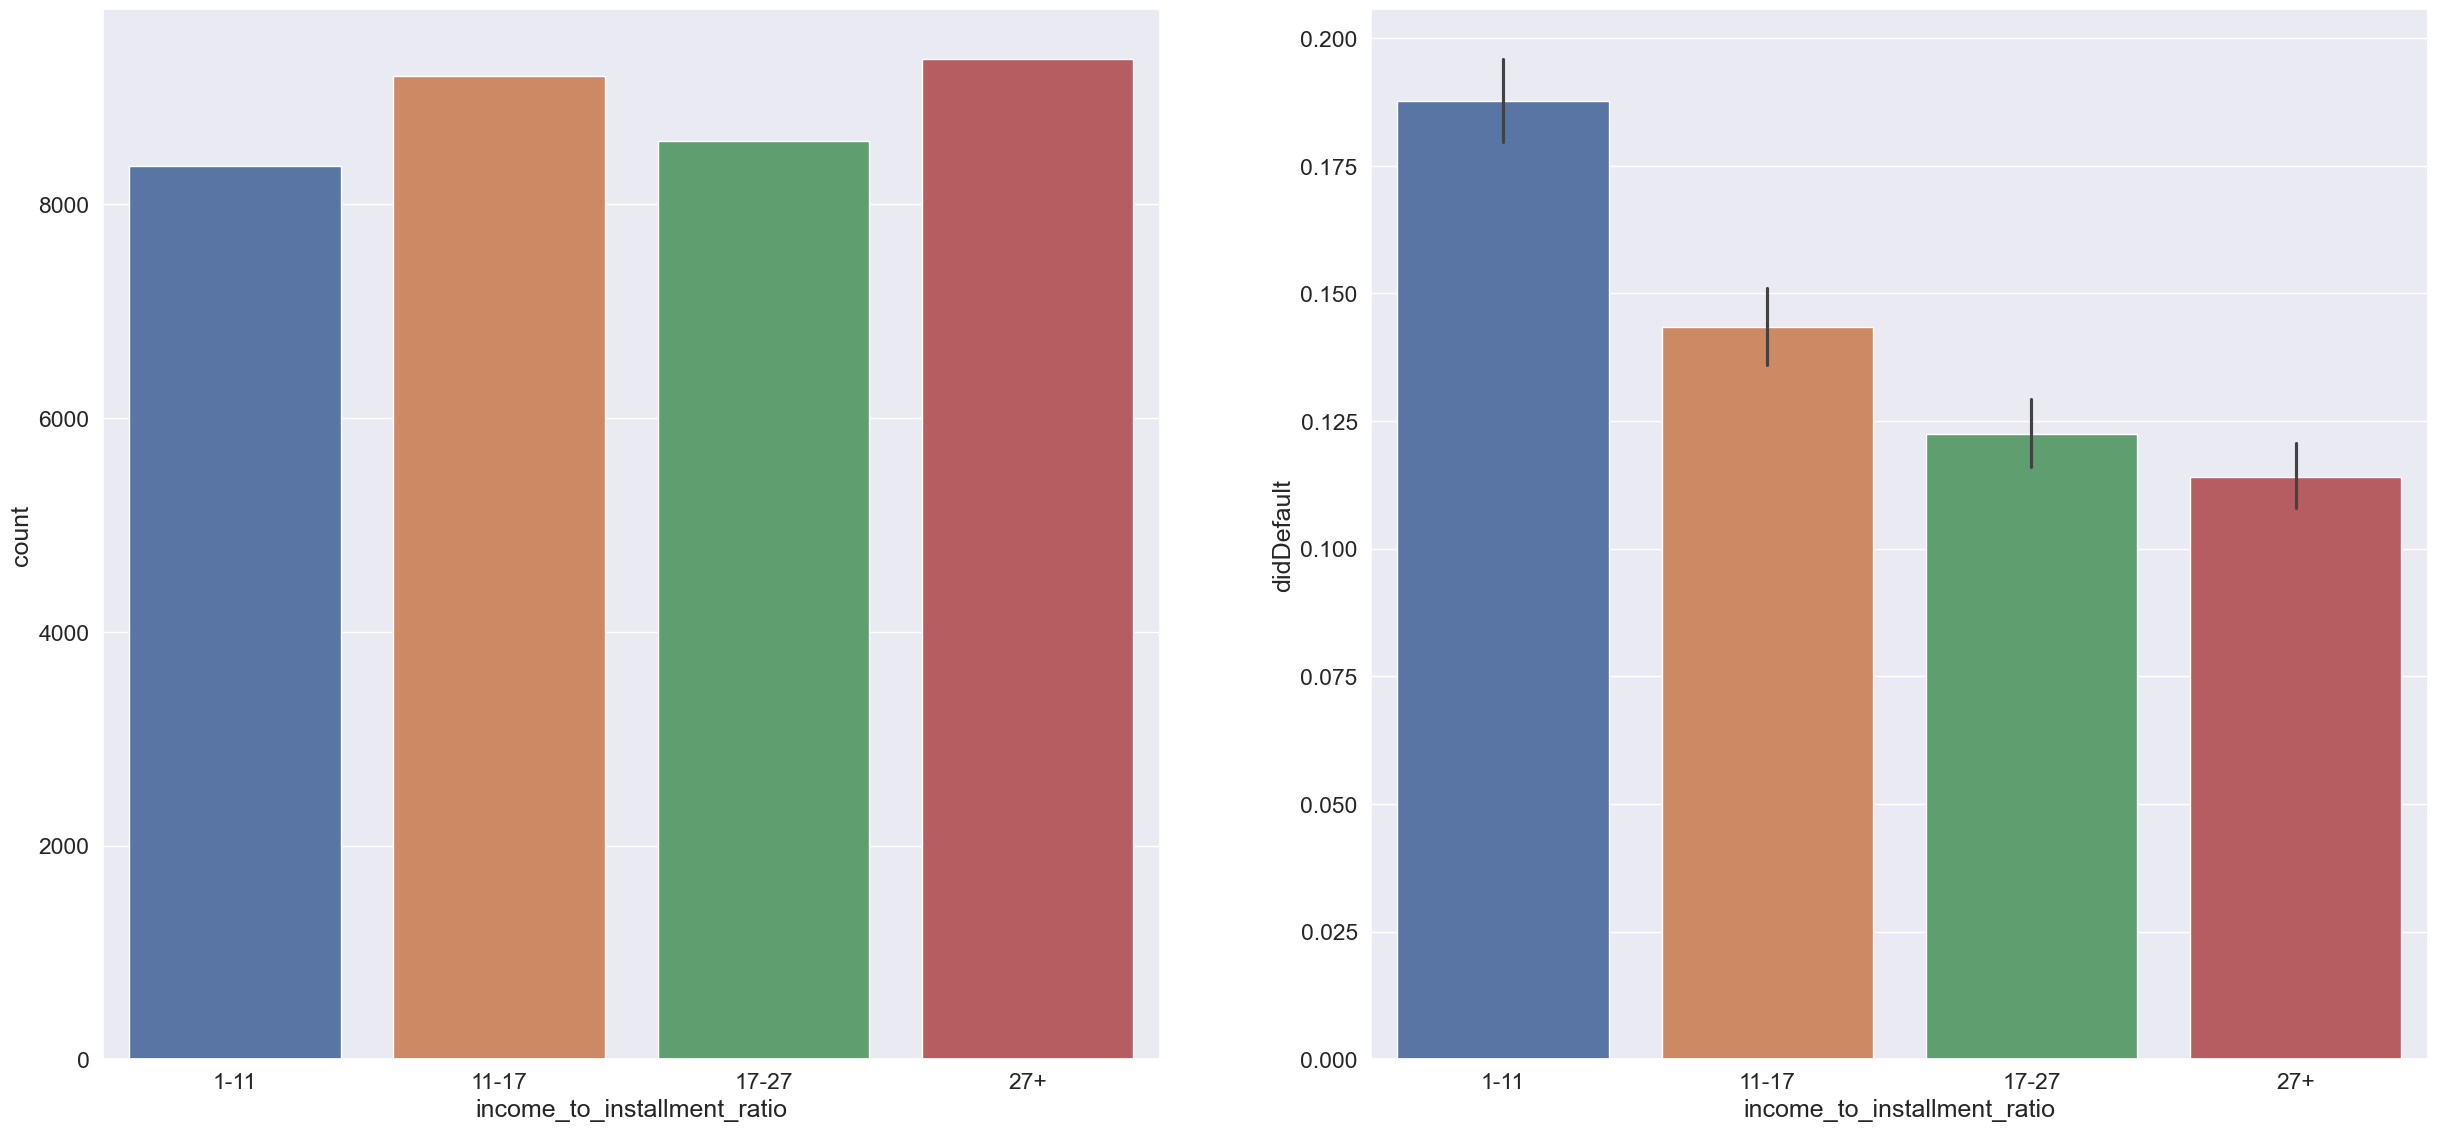

In [139]:
# int_rate_category correlation with default rate
checkDefaultRateFor('income_to_installment_ratio')

# Below graph indicates that
# 1. Higher the income_to_installment_ratio, lower are the chances of default

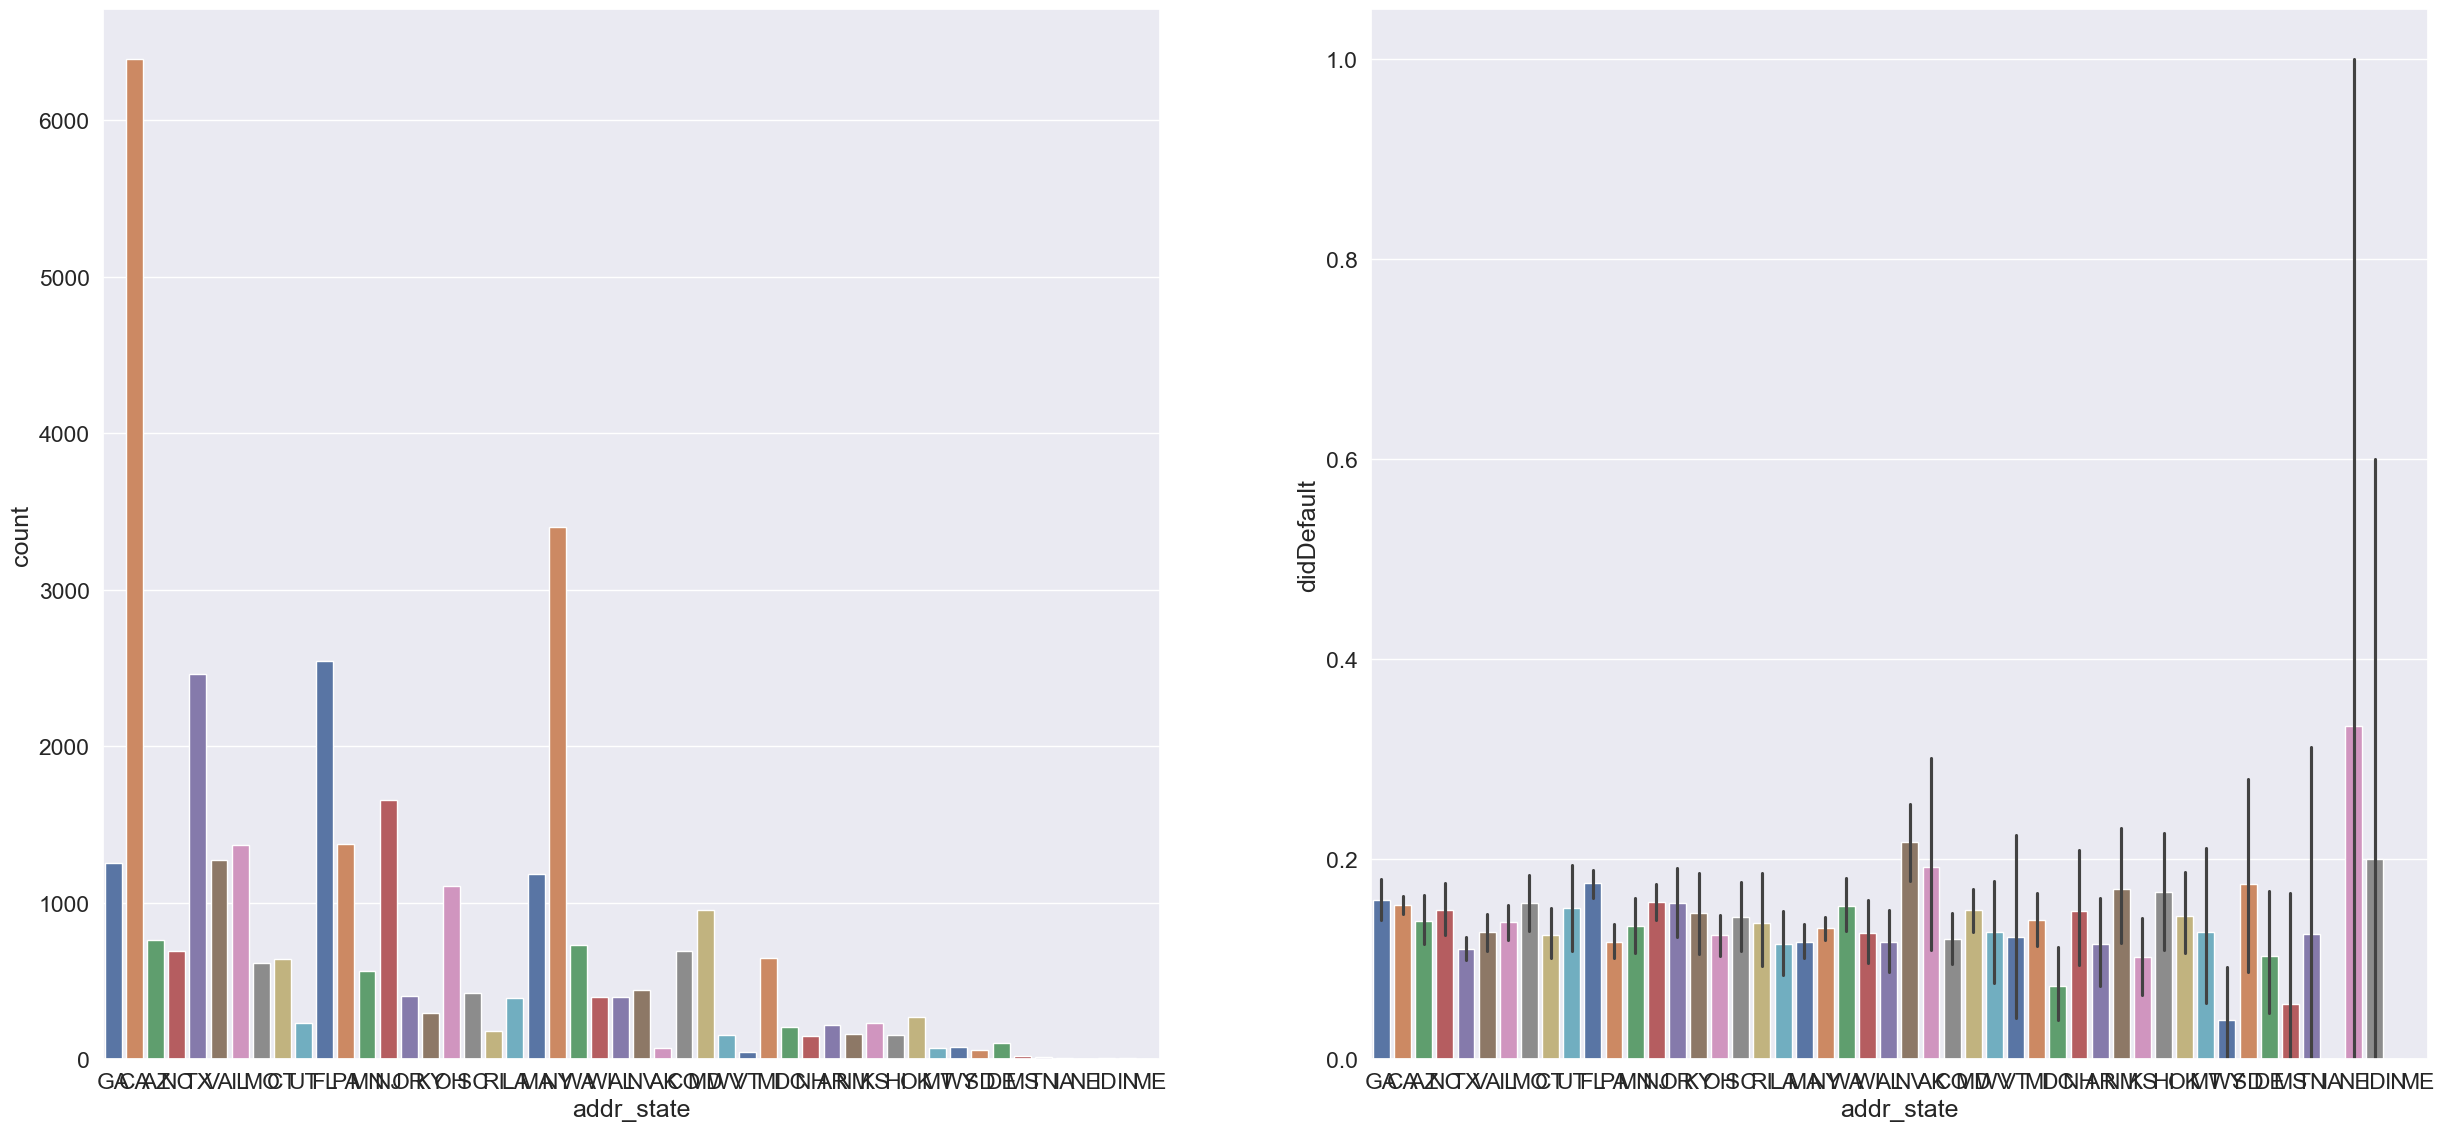

In [140]:
checkDefaultRateFor('addr_state')
# Below graph indicates that -
# 1. Default rate does not show any clear variation across states.
# 2. We can see some outlier states which show high default rate but we can ignore those as the count of loans are very low there

<Axes: xlabel='grade', ylabel='didDefault'>

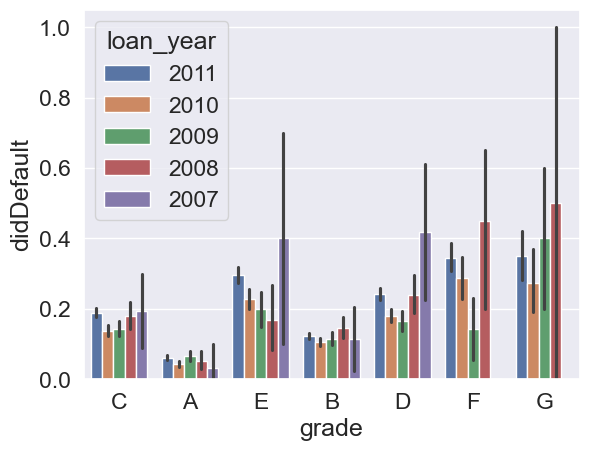

In [141]:
# Further checking if the default pattern across grade has changes year on year
sns.barplot(x='grade', y='didDefault', data=df, hue='loan_year', palette=("deep"))

<Axes: xlabel='income_group', ylabel='didDefault'>

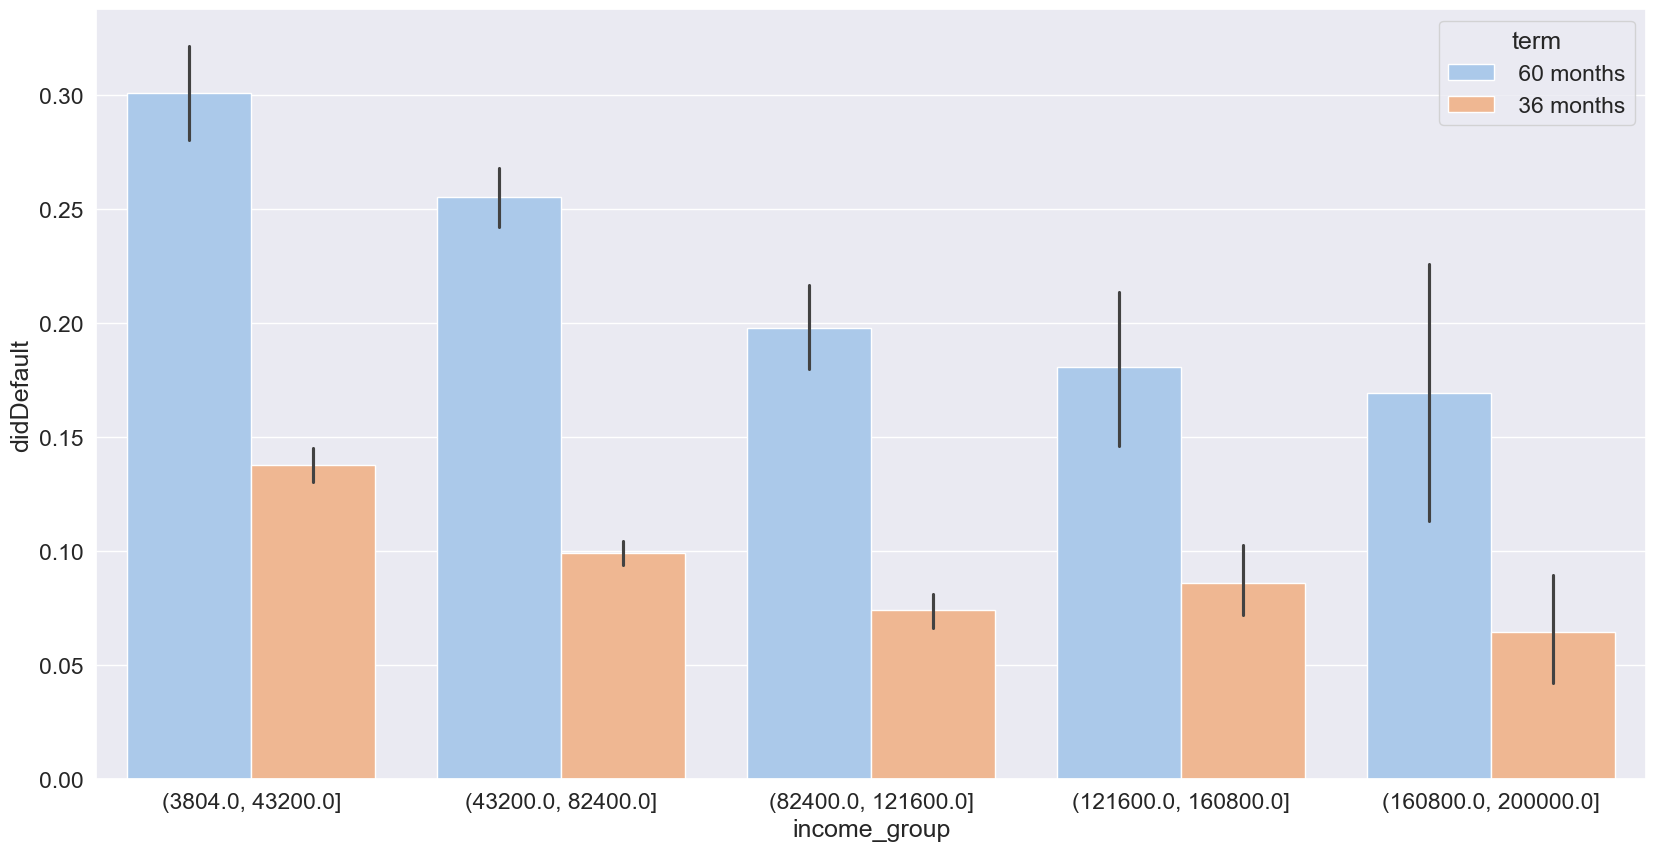

In [142]:
# Further checking if the default pattern across income_group has changed based on interest rate
plt.figure(figsize=(20,10))
sns.barplot(x='income_group', y='didDefault', data=df, hue='term', palette=("pastel"))

#TODO : We could name these salary buckets into more relatable categories say low net worth, medium, high etc

### Bivariate Analysis

In [143]:
# Defining a common method to draw plots for identify default rate across different categories

def checkRateAndAmountPatternFor(attribute):
    plt.figure(figsize=(35,15))
    sns.boxplot(x=df[attribute],y=df['int_rate'], hue=df[attribute], legend=False, palette="Set3")
    plt.show()
    plt.figure(figsize=(35,15))
    sns.boxplot(x=df[attribute],y=df['loan_amnt'], hue=df[attribute], legend=False, palette="Set2")
    plt.show() 

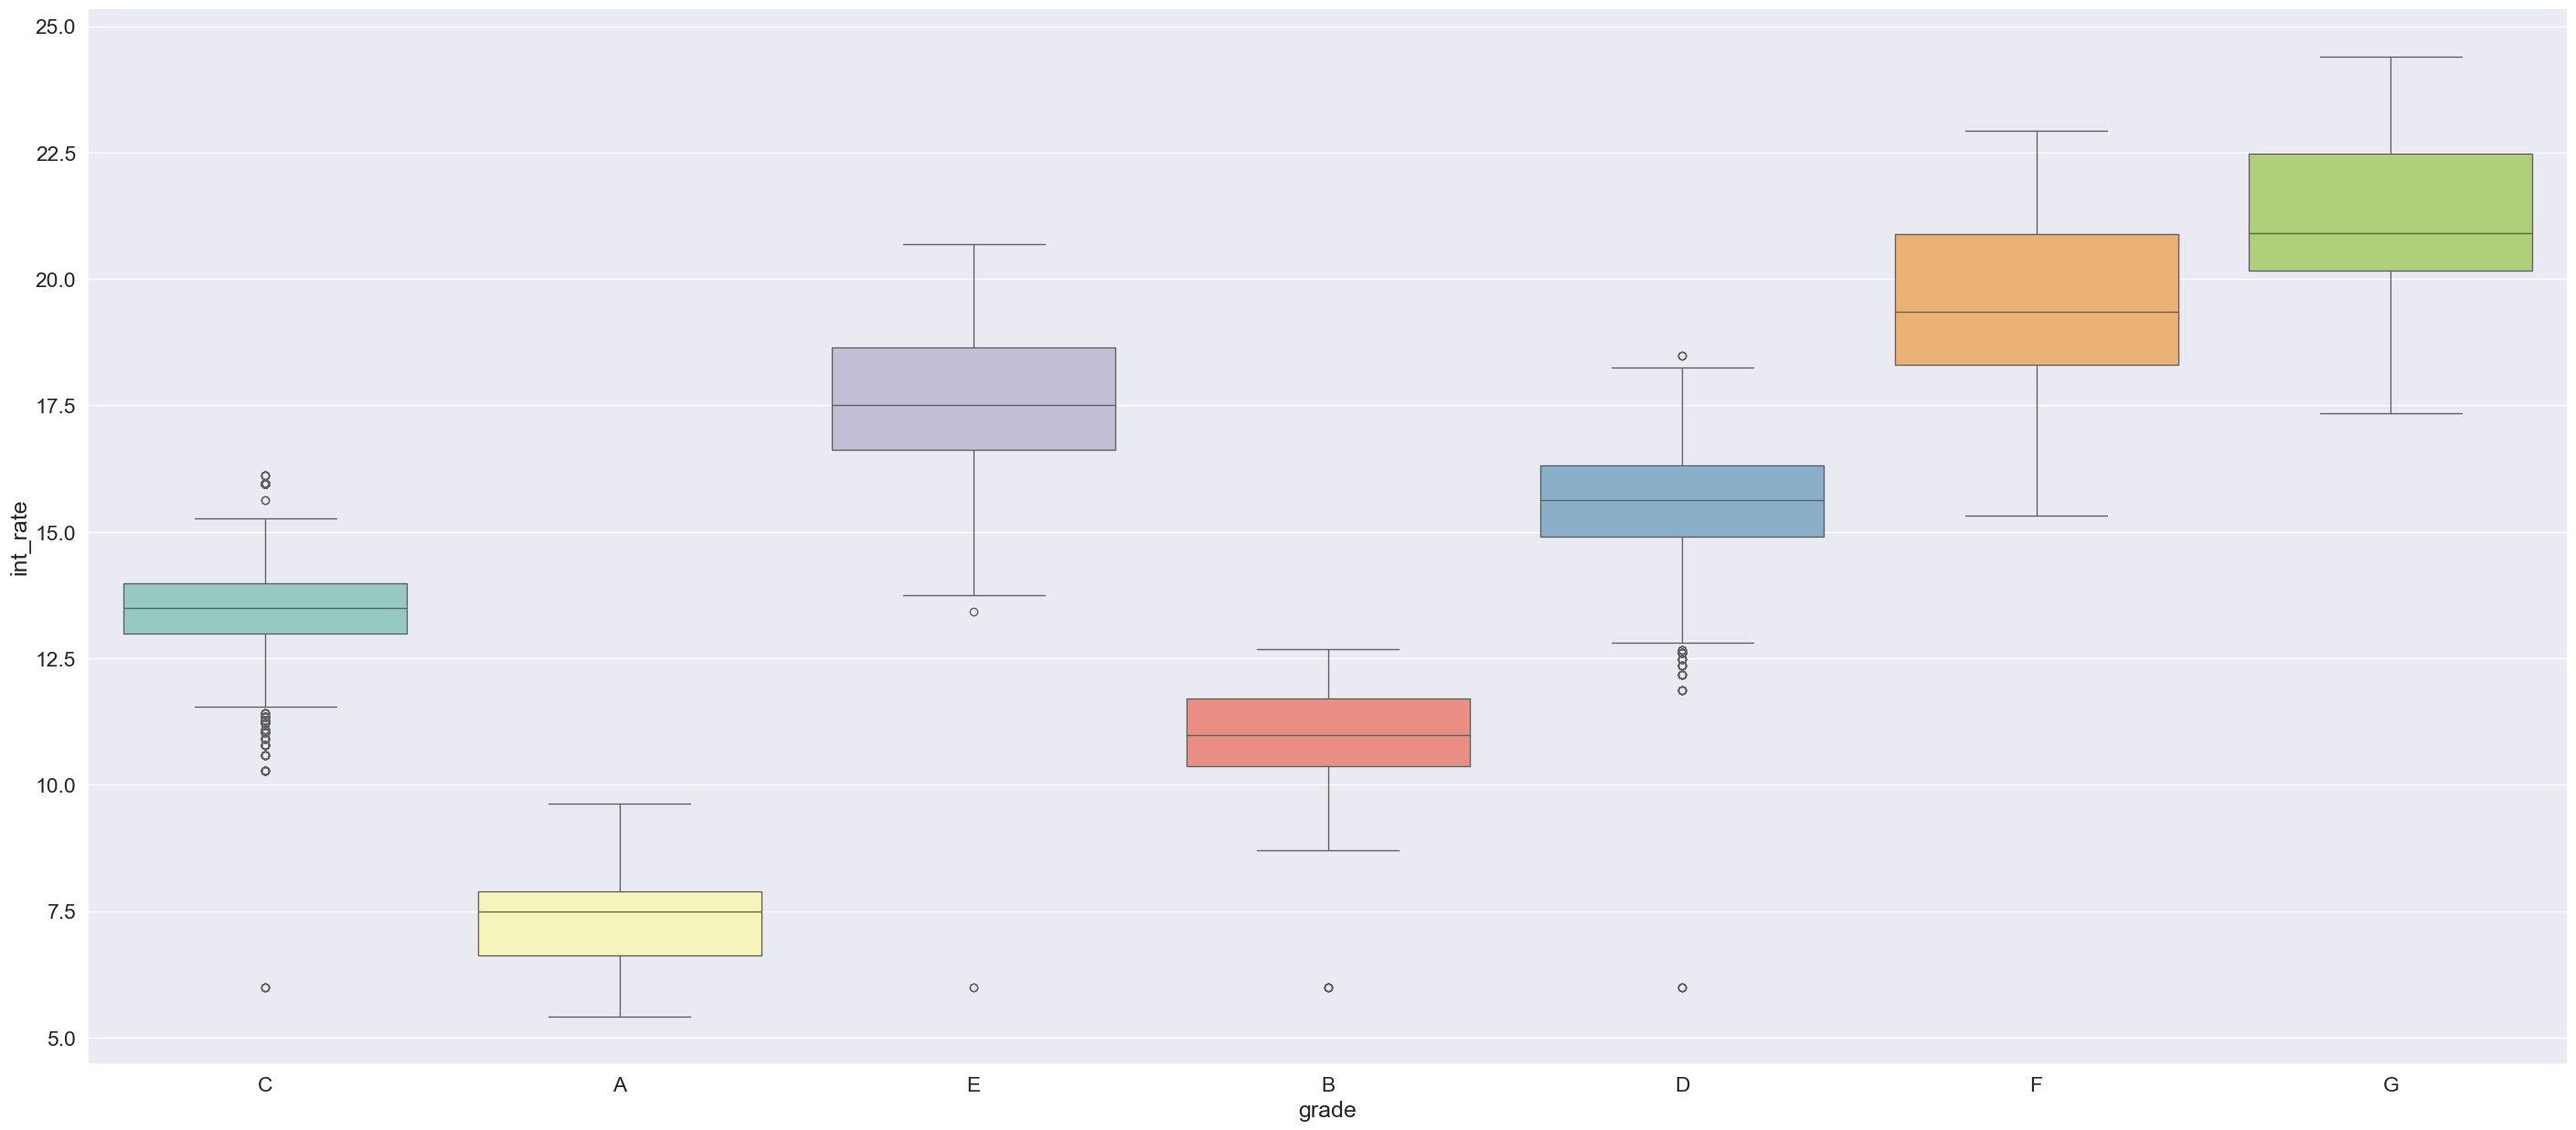

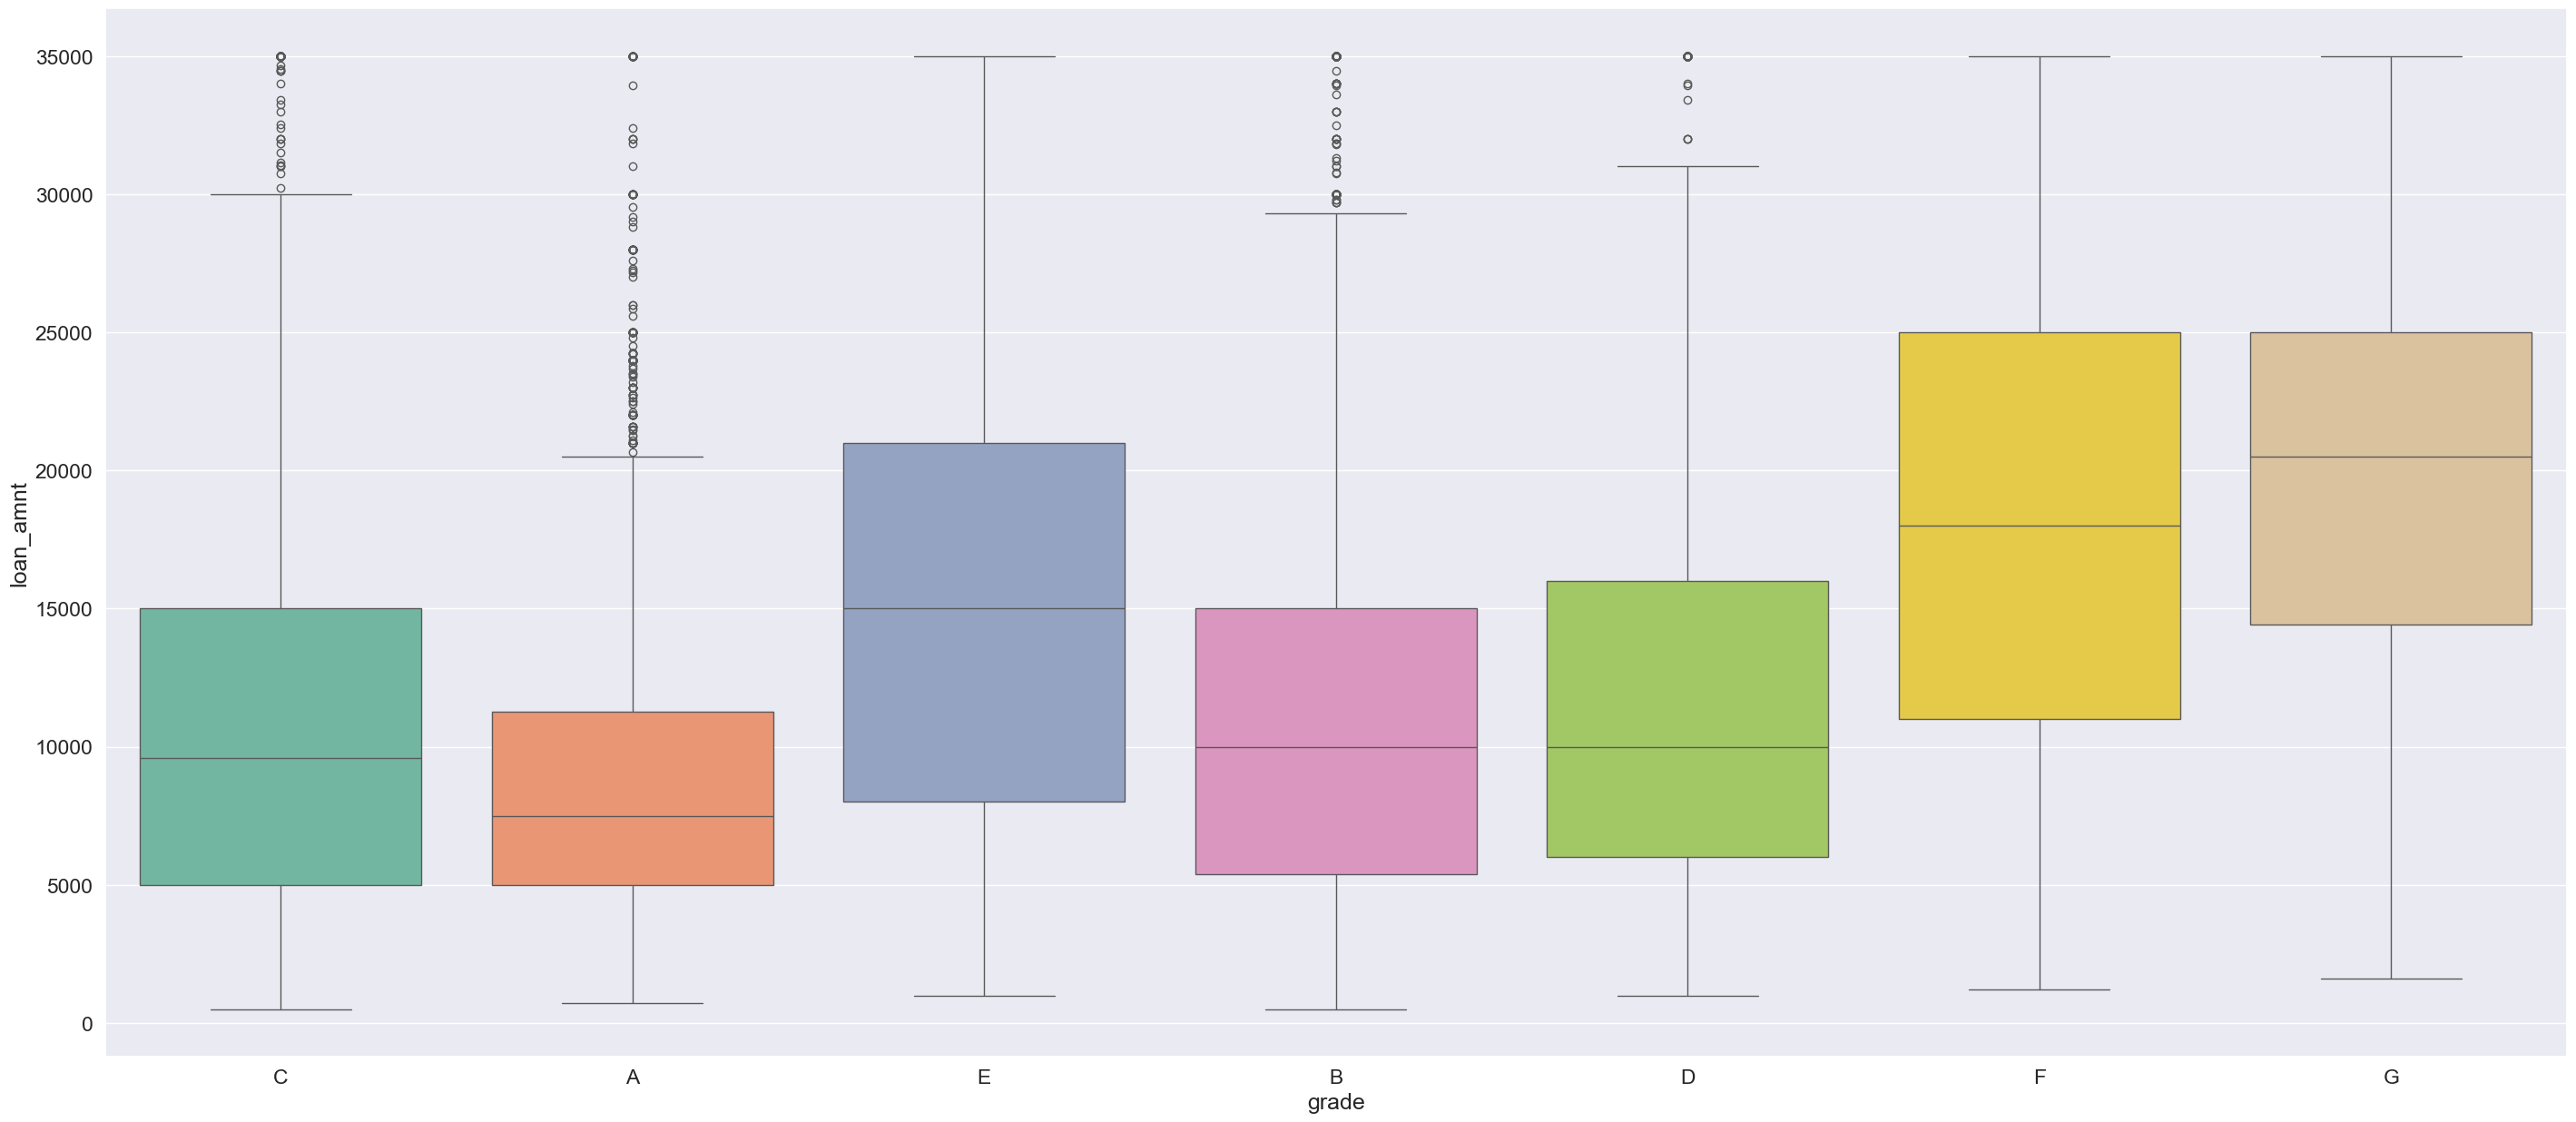

In [144]:
# Support the analysis by indicating int_rate is high for grades with high default rate
# This means that grading is done based of risk
checkRateAndAmountPatternFor('grade')

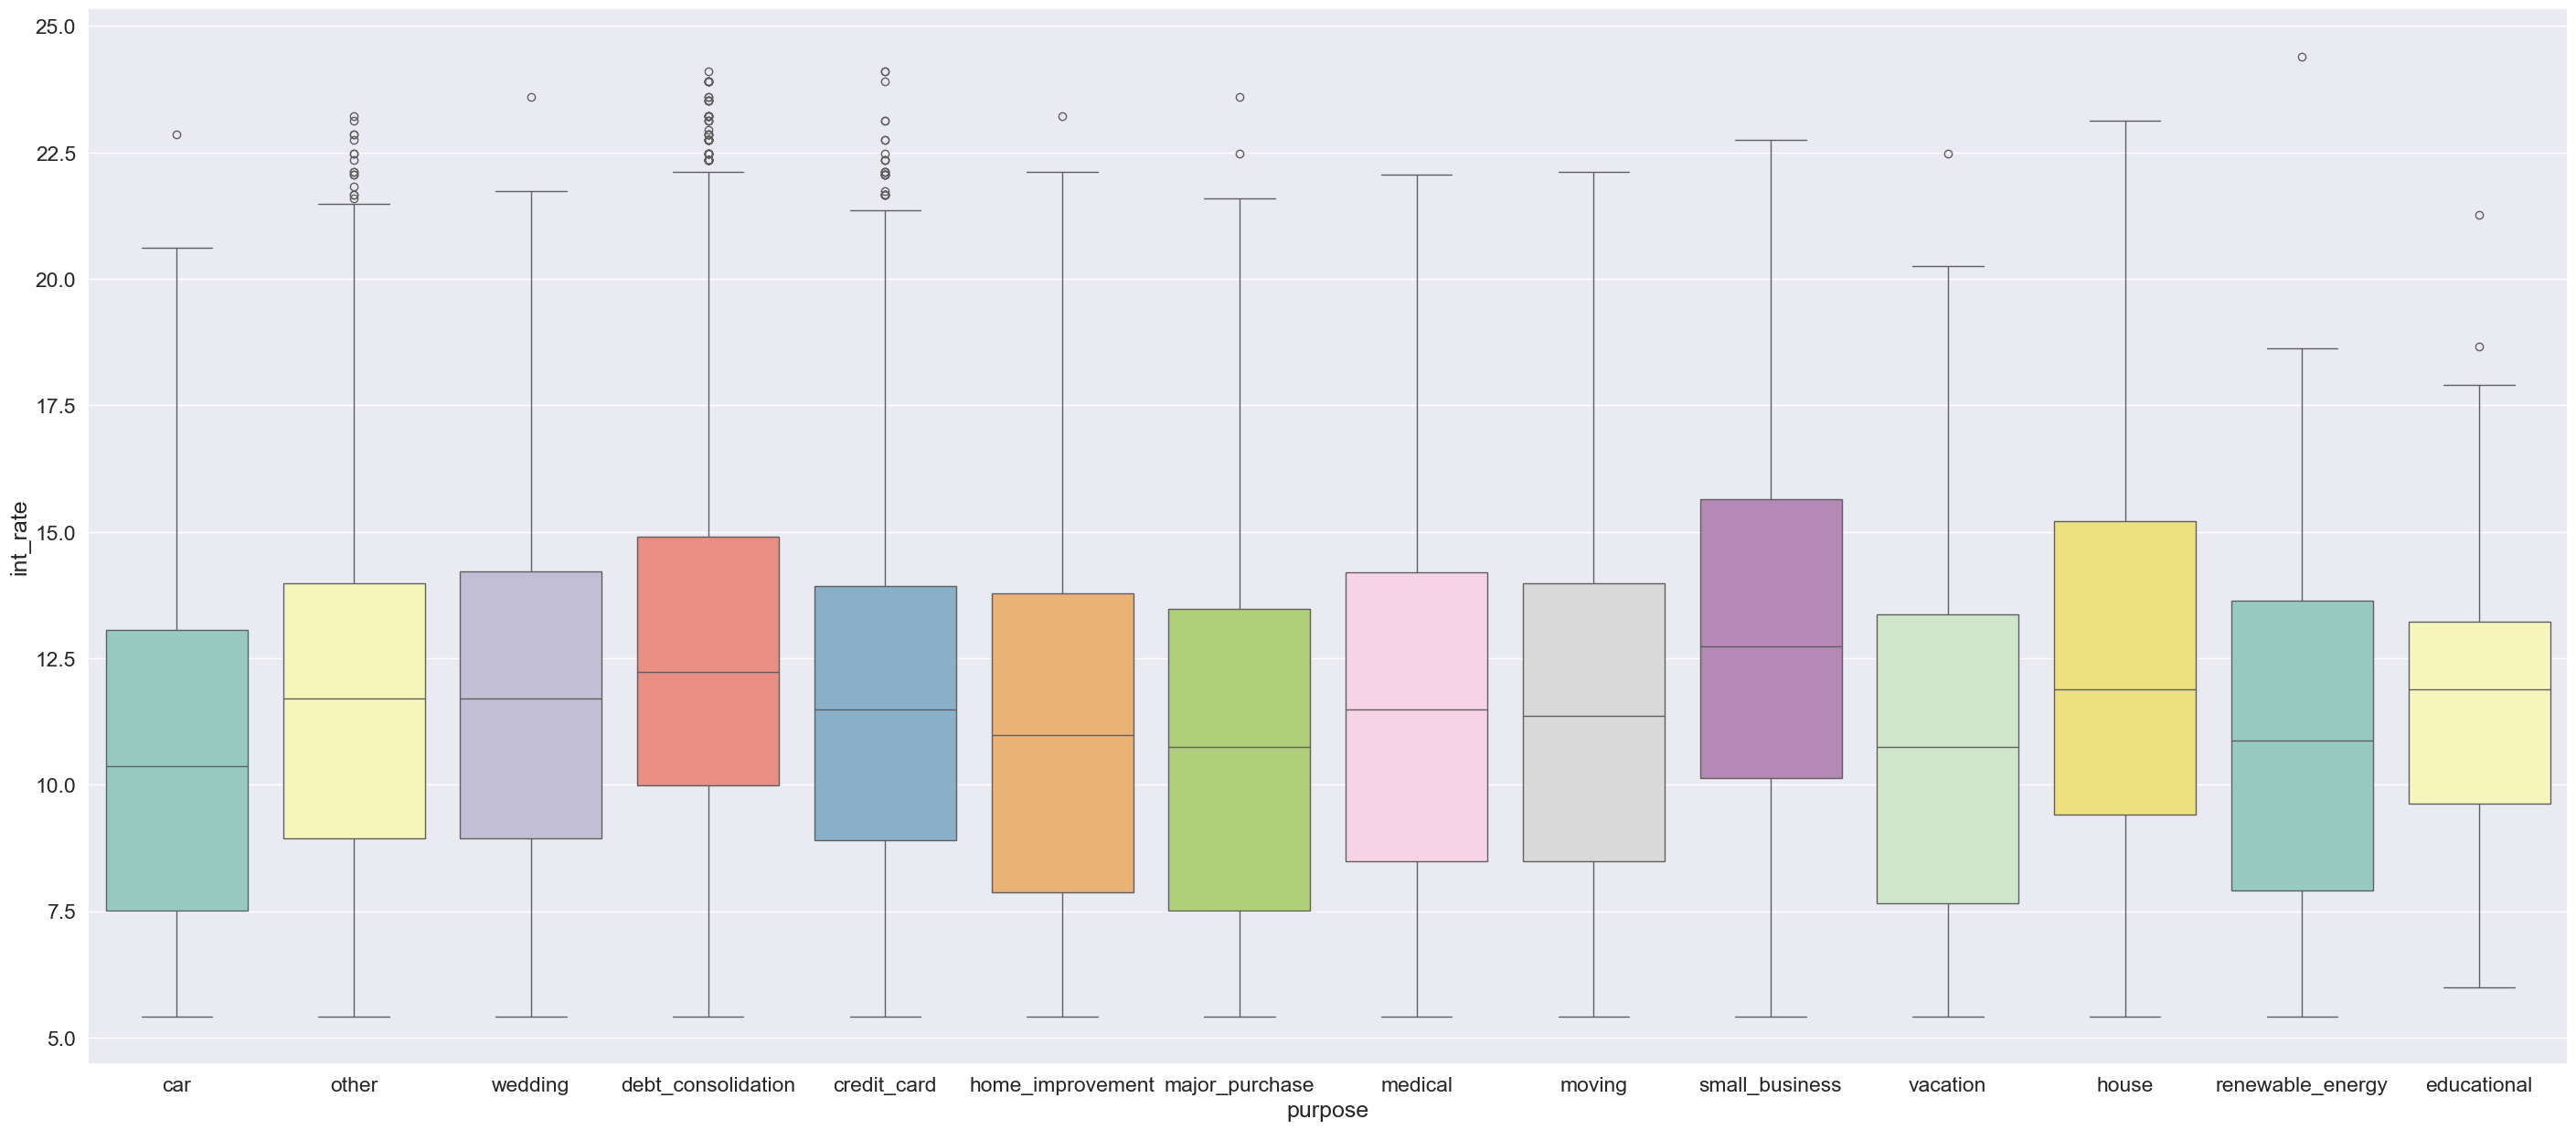

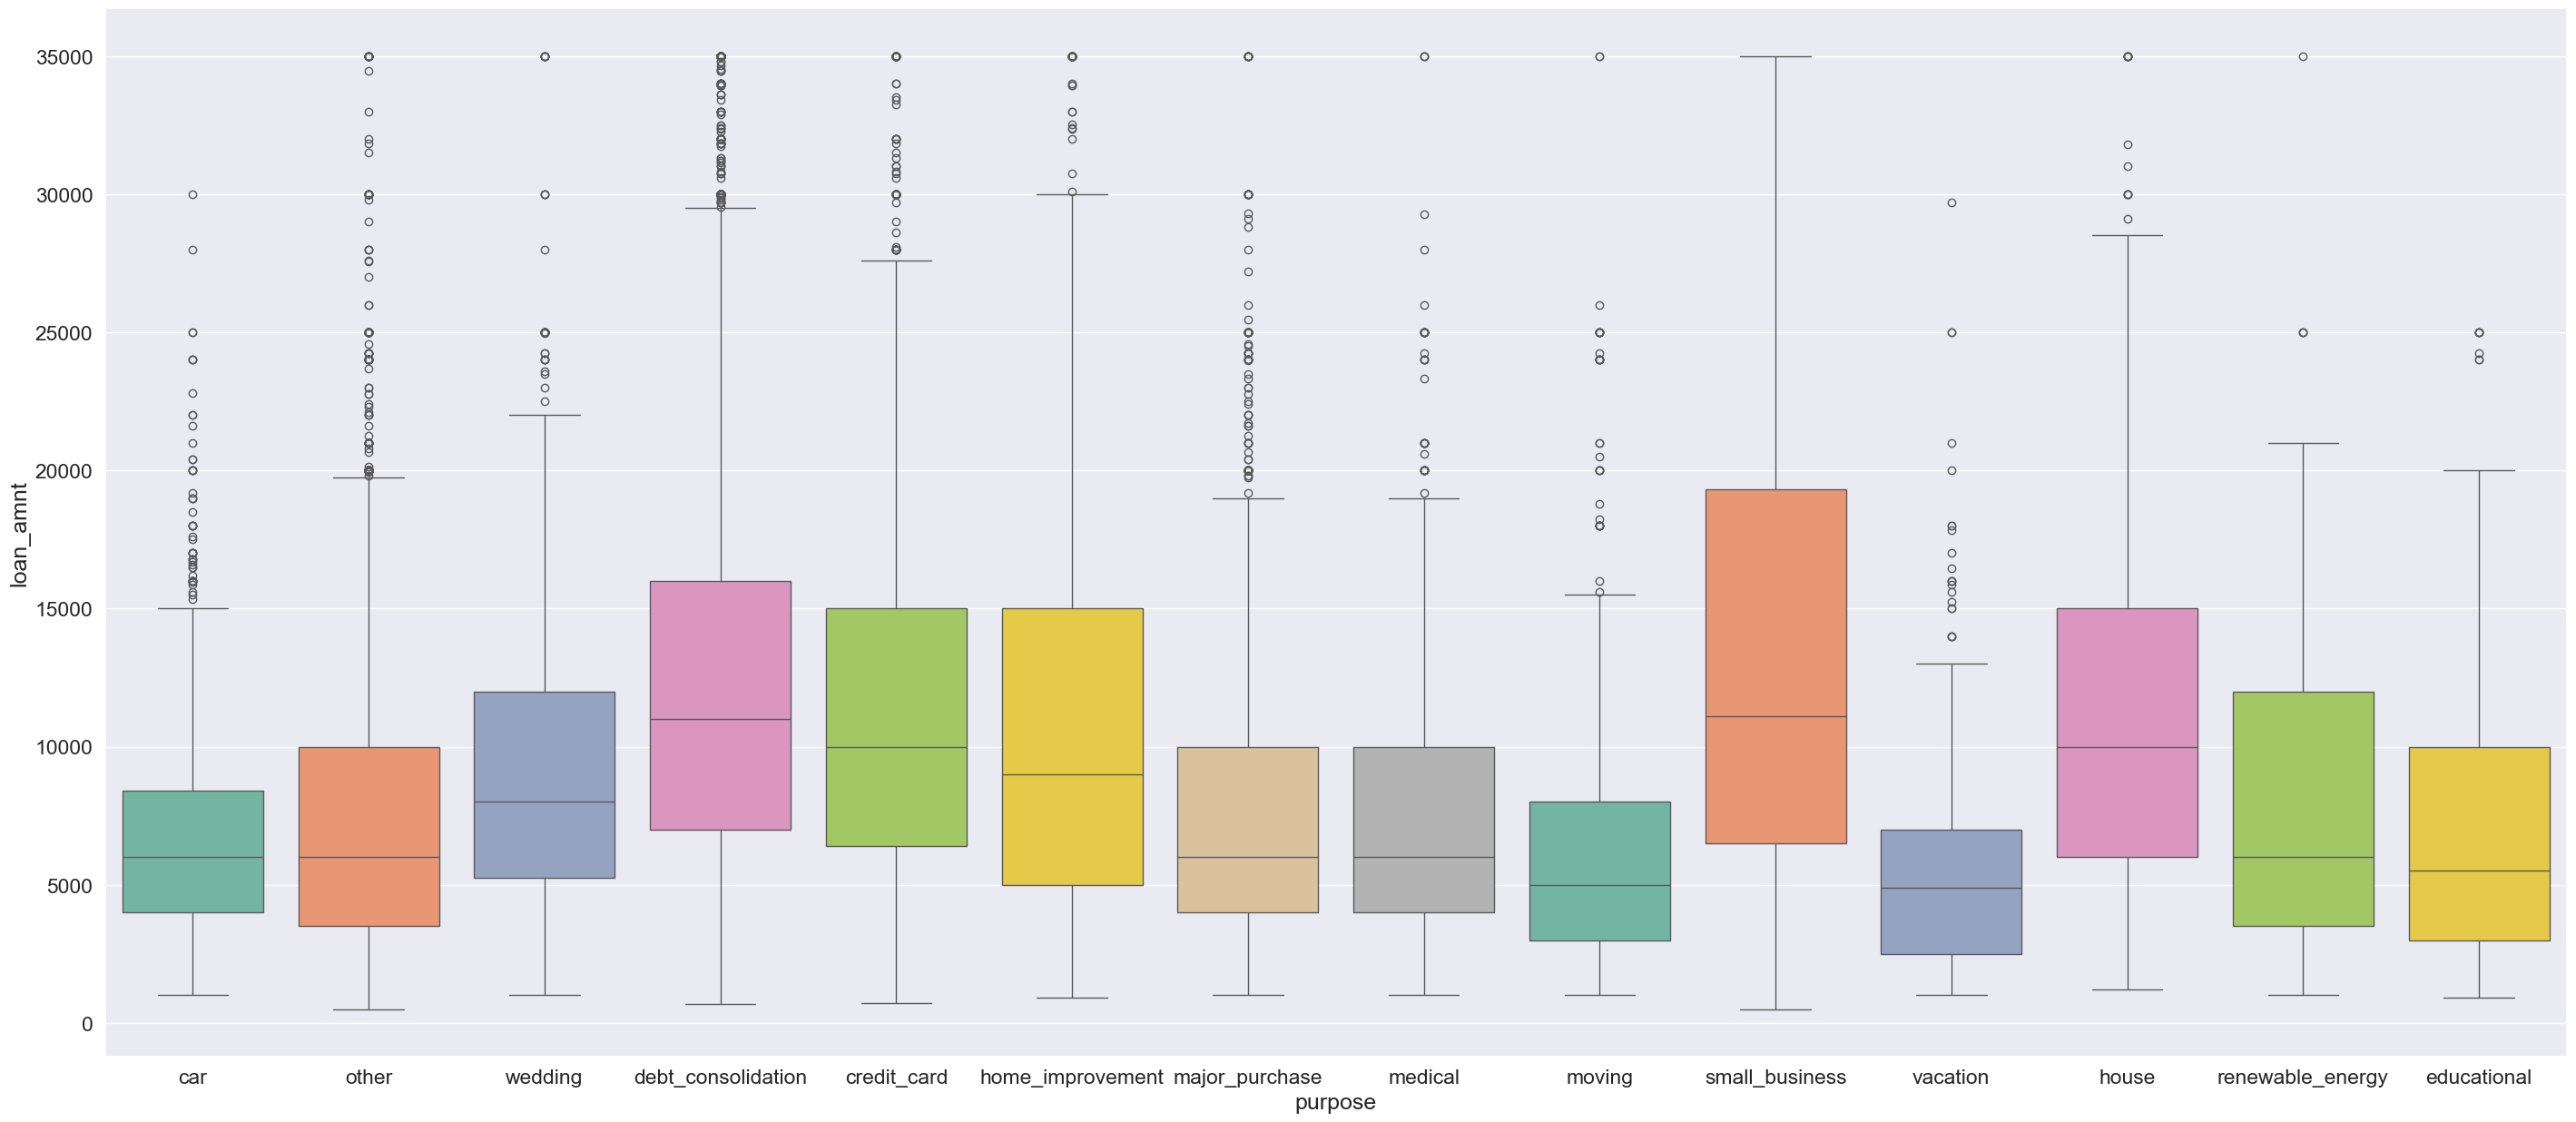

In [145]:
# Idnetifying interest rate & loan amount trend across different loan purposes
checkRateAndAmountPatternFor('purpose')

# Below graphs indicate a very nteresting analysis summarised below -
# 1. Interest rates do not vary largely across purpose of loan, however small business show a hihger median 
# & Inter-quartile range indicating that this purpose gets much higher amounts of loan issues as compared to others
# 2. However, we saw above that small business have signifactly higher track record of defaulting. 
# 3. This could mean that LC should probably consider offering higher interest rate or lower loan amount to this segment (to hedge the risk)

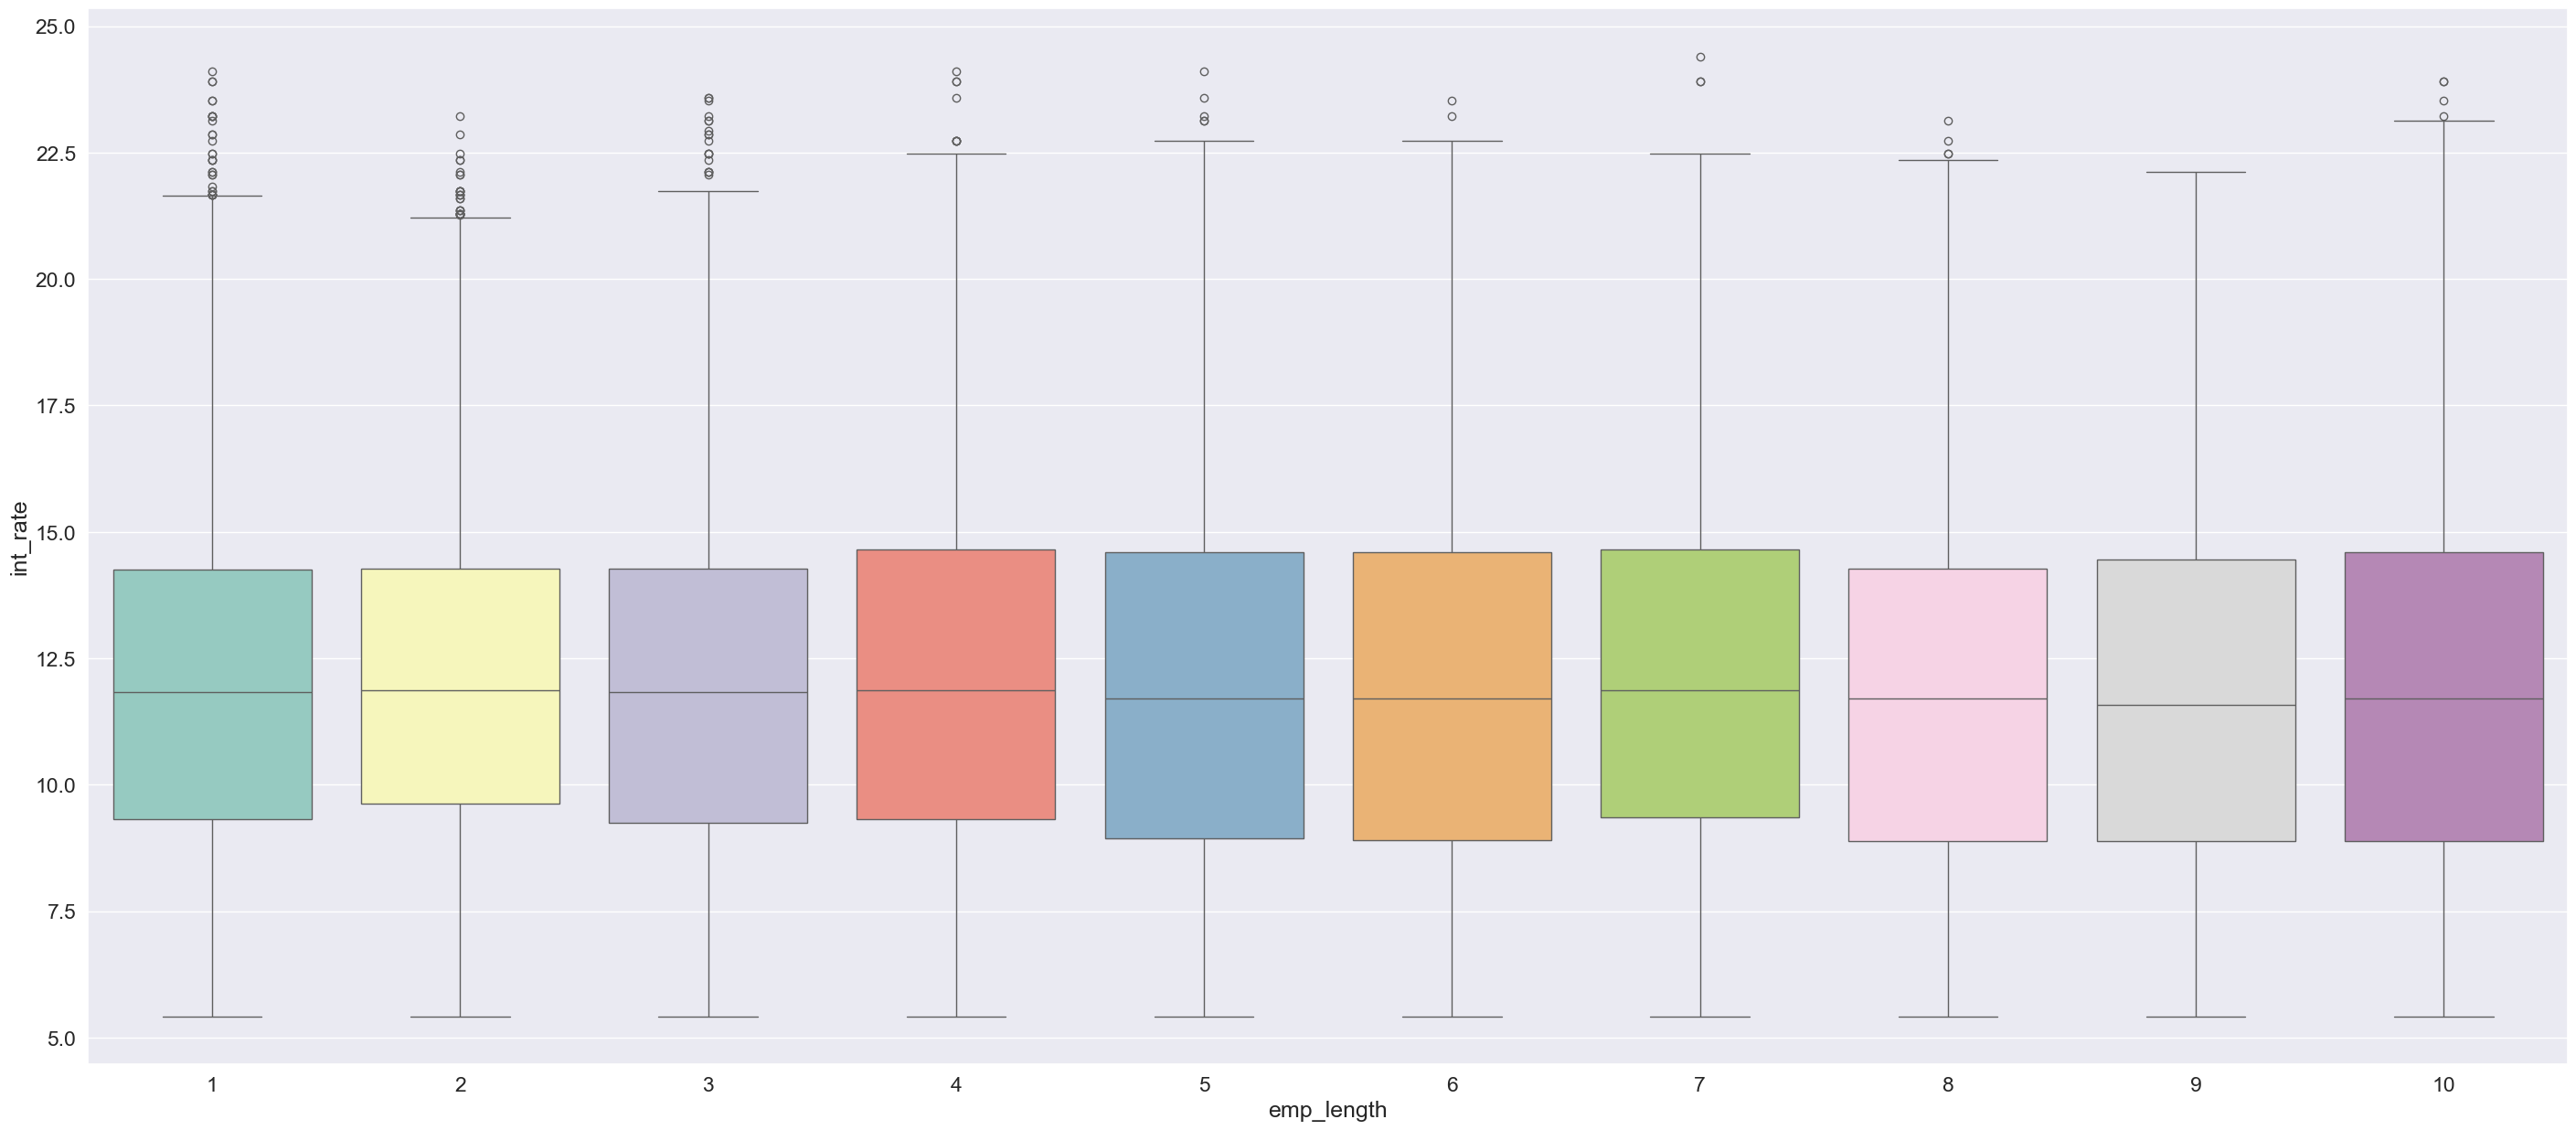

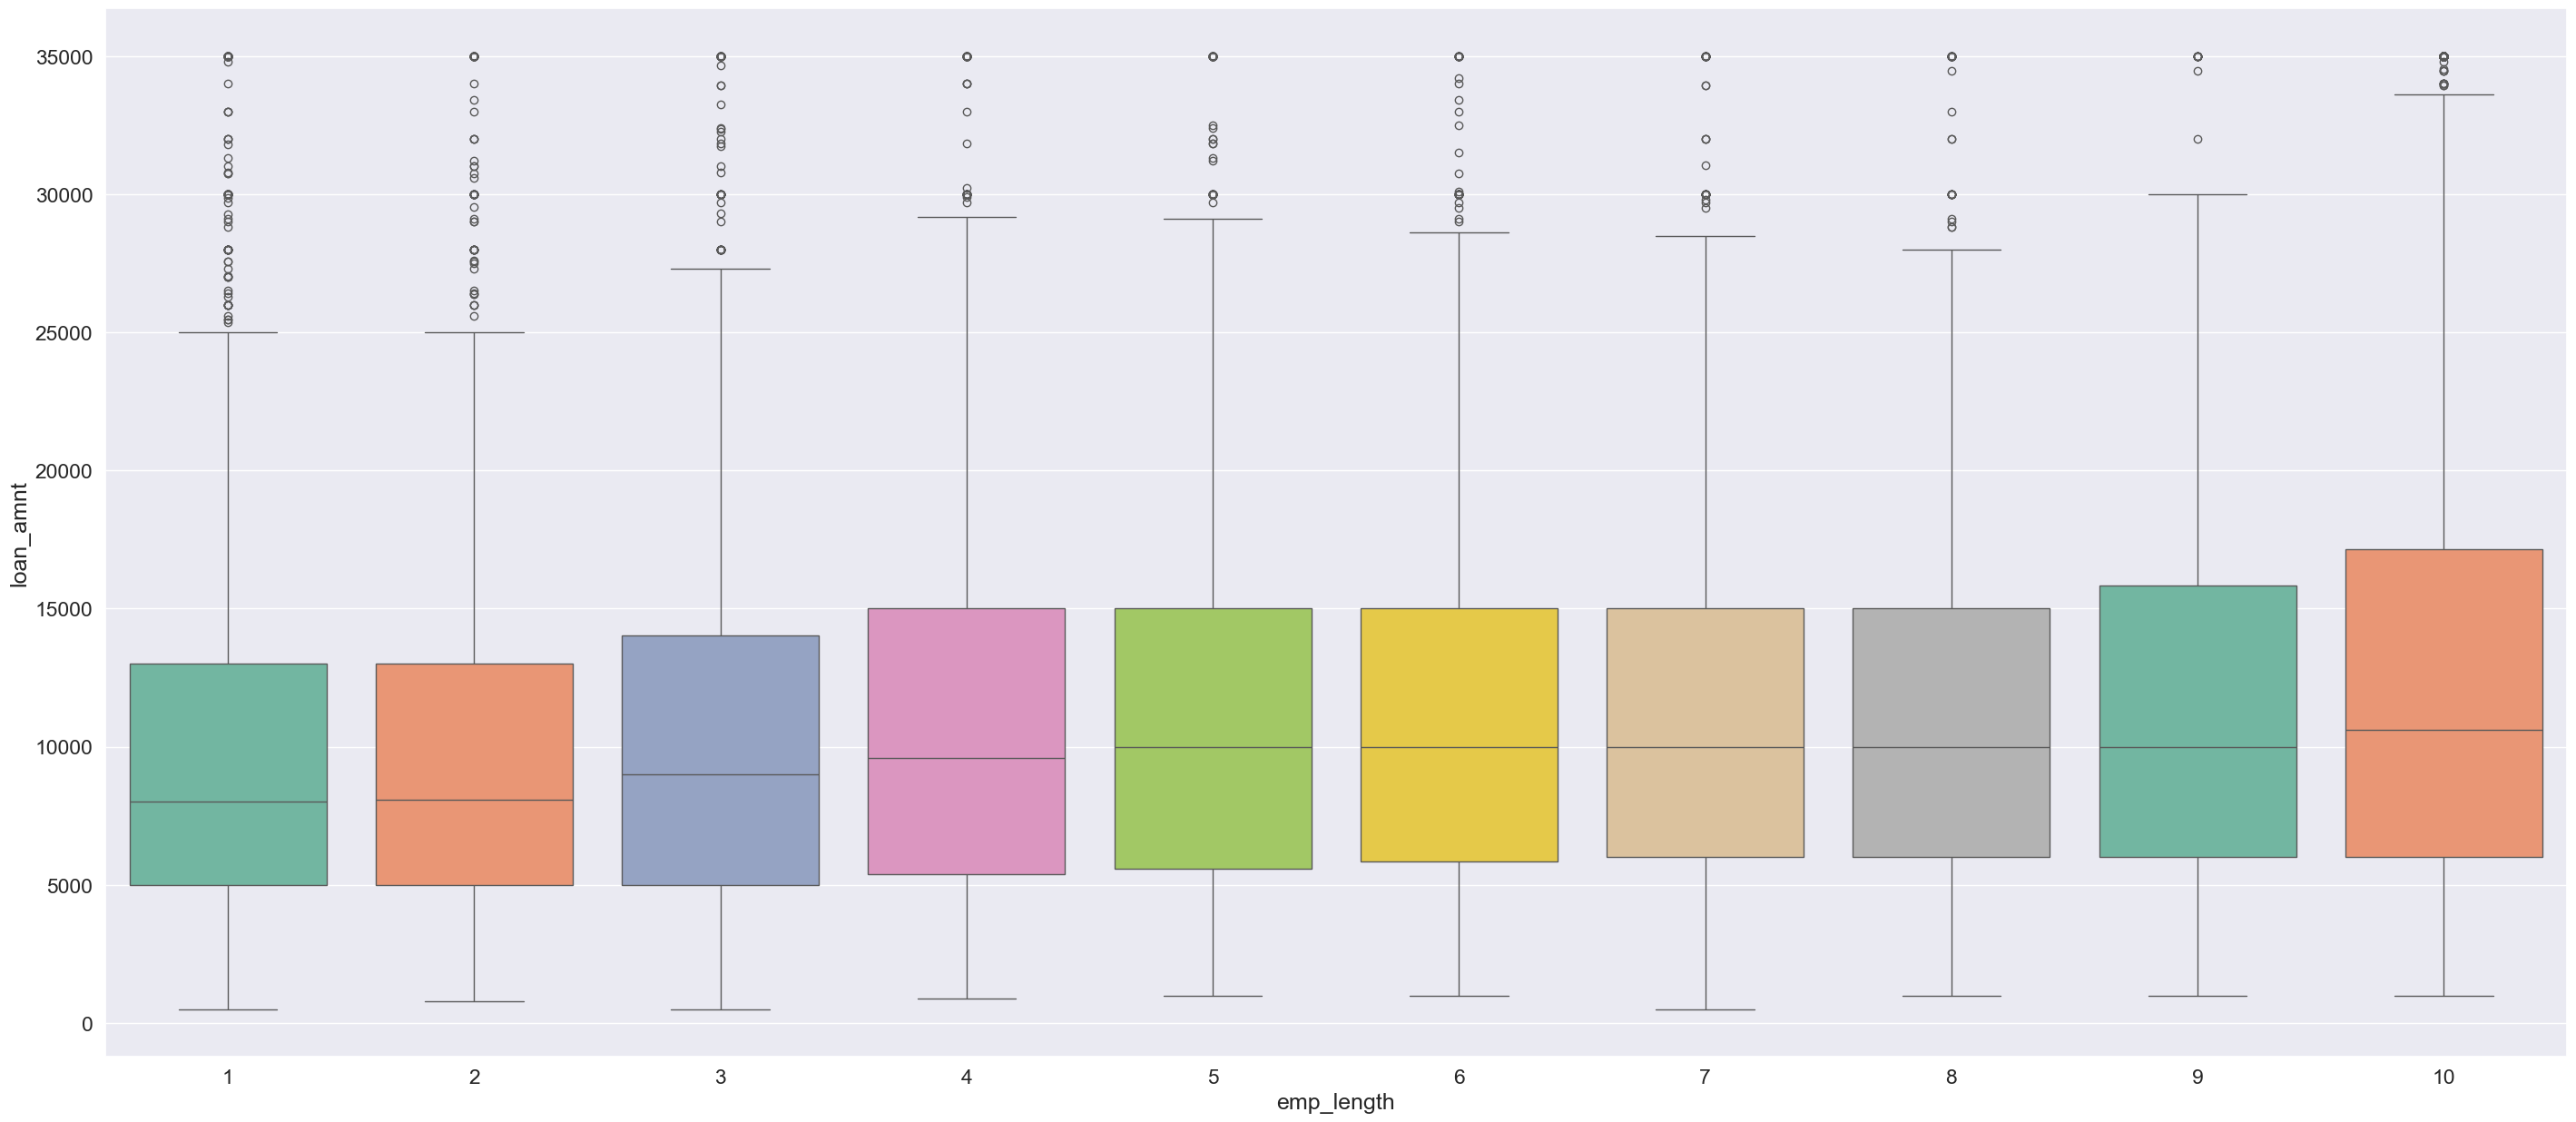

In [146]:
# Idnetifying interest rate & loan amount trend across different loan purposes
checkRateAndAmountPatternFor('emp_length')

# Below graph shows a consistent interest rate & loan amount pattern across employement length 

### Correlation between different attributes

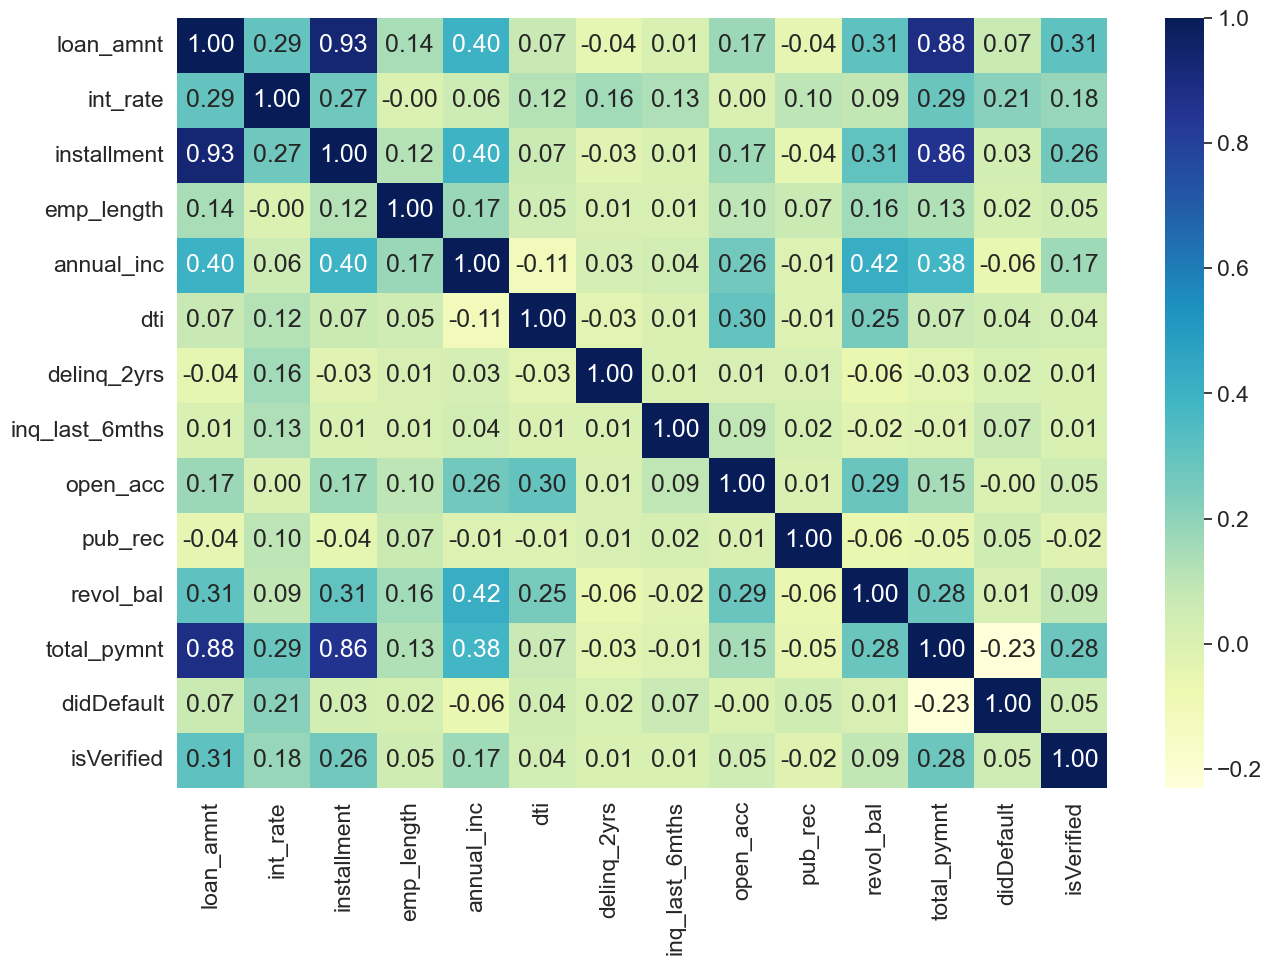

In [147]:
plt.figure(figsize=(15,10))
sns.heatmap(df[num_cols].corr(),annot=True,fmt='.2f',cmap="YlGnBu")
plt.show()

# Below heatmap does not indicate any strong correlation useful to our analysis. We do, however, see positive correlation betwee
# loan_amount & annual income which is in-line with above analysis we did